## Project: Feature Selection & Model Tuning - CreditCard Users Churn Prediction

## Description Background & Context

- The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

- Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

- You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

## Objective

- Explore and visualize the dataset. Build a classification model to predict if the customer is going to churn or not Optimize the model using appropriate techniques Generate a set of insights and recommendations that will help the bank Data Dictionary:

## Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights. The notebook should be run from start to finish in a sequential manner before submission. It is preferable to remove all warnings and errors before submission. Submission Guidelines :

### `Learning Outcomes:`
- Exploratory Data Analysis

- Data Pre-processing
- Model building using Logistic Regression, Bagging and Boosting techniques such as Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models. 
- Hyperparameter tuning using grid search and random search. 
- Model Performances and comparison.
- Insights & Recommendations


In [282]:
##################################################################################
# Project: Feature Selection & Model Tuning - CreditCard Users Churn Prediction ##
# submitted by "Bindu S Pillai"                                                 ##
# AIML PG Program condcuted by University of Texas, Austin. Dated - 4/23/2021   ##
##################################################################################

# Importing necessary libraries for execution of the project.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [442]:
# Loading file into Pandas dataframe.
file_in = "BankChurners.csv"
bank_churn = pd.read_csv(file_in)

In [443]:
# Displaying top 10 rows of file
bank_churn.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   
7     High School        Unknown     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   
5              36                         3                       1   
6              46                         6                       1   
7              27                         2                       2   
8              36                         5                       2   
9              36                         6                       3   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   
5                      2        4010.0                 1247           2763.0   
6                      3       34516.0                 2264          32252.0   
7                      2       29081.0                 1396          27685.0   
8                      0       22352.0                 2517          19835.0   
9                      3       11656.0                 1677           9979.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   
6                 1.975             1330              31                0.722   
7                 2.204             1538              36                0.714   
8                 3.355             1350              24                1.182   

In [444]:
# Data distribution and other metrics for different features
bank_churn.describe().transpose()

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   
Unnamed: 21                   0.0           NaN           NaN          NaN   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   
Unnamed: 21                        NaN           NaN           NaN   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01  
Unnamed: 21                        NaN

In [101]:
#The last column is unitented. Can drop it. 
bank_churn.drop("Unnamed: 21", axis = 1, inplace=True)

In [445]:
#Information on the columns or features such as data types etc.
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [103]:
print("Missing values in each column")
bank_churn.isnull().sum()

Missing values in each column


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [104]:
print("Number of unique values in each column")
bank_churn.nunique()

Number of unique values in each column


CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [446]:
#Size of the data, no. of rowws and  columns
bank_churn.shape

(10127, 22)

In [106]:
## Dropping CLIENTNUM as it's only an ID field.Copying to new dataframe "bank_ch". So original datframe, 
## "bank_churn" is intact.
bank_ch=bank_churn.drop("CLIENTNUM", axis =1)

## Fixing the data types
- Attrition_Flag ,Gender,Education_Level,Marital_Status,Income_Category and Card_Category are of object type, we can change them to categories.
-  converting "objects" to "category" reduces the data space required to store the dataframe

In [107]:
#converting "objects" datatypes to "category" datatypes
bank_ch["Attrition_Flag"] = bank_ch["Attrition_Flag"].astype("category")
bank_ch["Gender"] = bank_ch["Gender"].astype("category")
bank_ch["Education_Level"] = bank_ch["Education_Level"].astype("category")
bank_ch["Marital_Status"] = bank_ch["Marital_Status"].astype("category")
bank_ch["Income_Category"] = bank_ch["Income_Category"].astype("category")
bank_ch["Card_Category"] = bank_ch["Card_Category"].astype("category")

In [108]:
#Verifying the datatypes to make sure no more object types left
bank_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## Observations 

- Attrition_Flag is the dependent variable. It has been converted to categorical variable now.


In [447]:
# Again checking,metrics on the new dataframe such as standard deviation mean Quartiles etc, This is more readable now
bank_ch.describe().transpose()

count         mean          std     min       25%  \
Attrition_Flag            10127.0     0.160660     0.367235     0.0     0.000   
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Education_Level            8608.0     3.061106     1.412810     1.0     2.000   
Marital_Status             9378.0     1.579974     0.634956     1.0     1.000   
Income_Category            9015.0     2.342984     1.356455     1.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Attrition_Flag               0.000      0.000      1.000  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Education_Level              3.000      4.000      6.000  
Marital_Status               2.000      2.000      3.000  
Income_Category              2.000      4.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

**Observations-**   

* Customer age ranges from 26 to 73, both and median almost same at 46% being 46.
* Months on Book ranges from 13 to 56. Again both mean and mode around 36 or 3 years. The stats show that not many customers are staying beyond 3 - 3.5 years.
* Bank has provided credit limit from 1.4k to 34.5K. Average 8.6K , mode only 4.5K
* Total revolving balance varies from 0 to around 2500. Mode of around 1300.
* No. of products used by customers vary from 1-6. Most people have 4 prodcts
* Inactive months for most people are 2 in past 12 years.
* Highest transaction amount for past 12 months is 18,484. For most people its 3899.
* max utilization ratio is almost 100% of credit limit. Average being 27%. Mode just 17%. There may be outliers.

In [448]:
## Checking for value counts of categorical columns. How many of each value is there.
cat_cols=['Attrition_Flag','Gender', 'Dependent_count', 'Education_Level','Marital_Status','Income_Category',
          'Card_Category', 'Total_Relationship_Count','Months_Inactive_12_mon', 'Contacts_Count_12_mon']

for column in cat_cols:
    print(bank_ch[column].value_counts())
    print('-'*30)

0    8500
1    1627
Name: Attrition_Flag, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
------------------------------
4.0    3128
2.0    2013
1.0    1487
3.0    1013
5.0     516
6.0     451
Name: Education_Level, dtype: int64
------------------------------
1.0    4687
2.0    3943
3.0     748
Name: Marital_Status, dtype: int64
------------------------------
1.0    3561
2.0    1790
4.0    1535
3.0    1402
5.0     727
Name: Income_Category, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------------------------------
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64
------------------------------
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Na

**Observations-**   

* Majority class is "Existing Customer" for Target variable, Attrition_Flag.
* There are more Female customers than Male Customers
* Most customers are graduate. Least are Divorecd.
* Most customers are Married. Least are Phd
* Low-income customers are majority, below $40K. 120k and above are a minority
* Most customers as expected (due to low-income) have the lowest rated card, blue. Platinum are just 20.
* Most customers have 3 -6 products. Fewer have 1 or 2 products.
* Most customers were inactive for 1-3 months. Few were inactive for 6 months.
* Most customers contacted the bank 2-3 times.
* There are many "unknown" values in 3 fields, 'Education_Level','Marital_Status','Income_Category', which might need to be treated.

## EDA

## Univariate Analysis

In [111]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Observations on Attrition_Flag

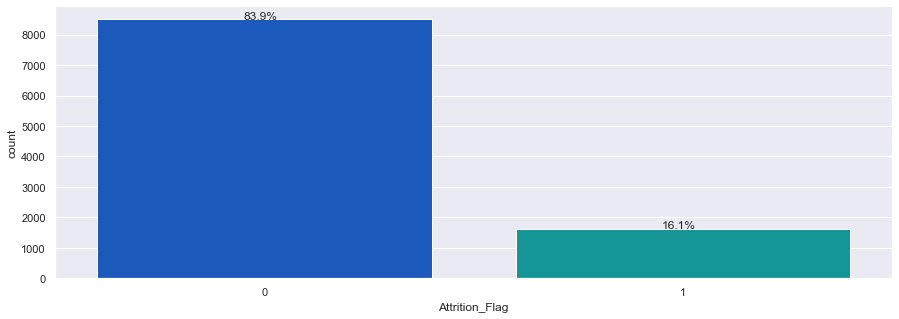

In [449]:
#Plot barplot on attrition_flag by using sns count plot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Attrition_Flag"],palette='winter')
perc_on_bar(ax,bank_ch["Attrition_Flag"])

* 16.1% of the customers are attrited. 83.9% are staying.

## Observations on Gender

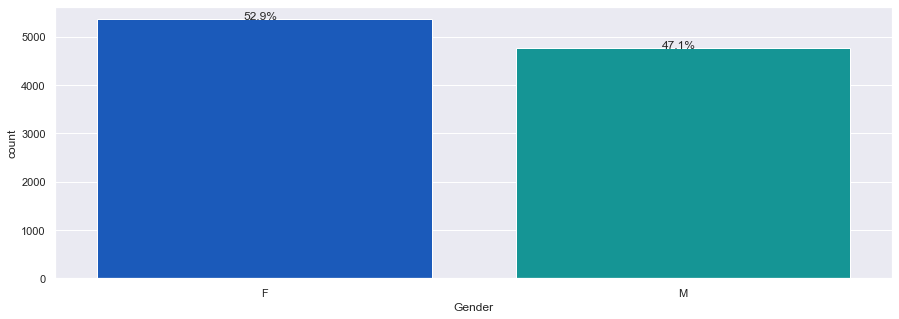

In [113]:
#Plot barplot on Gender by using sns countplot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Gender"],palette='winter')
perc_on_bar(ax,bank_ch["Gender"])

 * 52.9% of the customers are female.

## Observations on Dependent_count

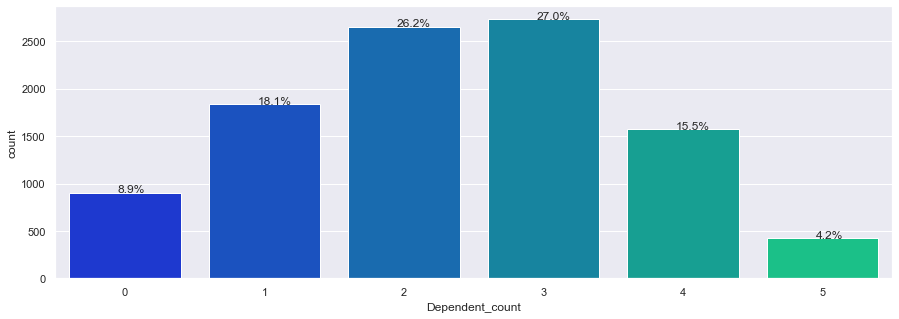

In [114]:
#Plot barplot on Dependent_count by using sns countplot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Dependent_count"],palette='winter')
perc_on_bar(ax,bank_ch["Dependent_count"])

 * Most of the customers have 2 or 3 dependents. 

## Observations on Education_Level

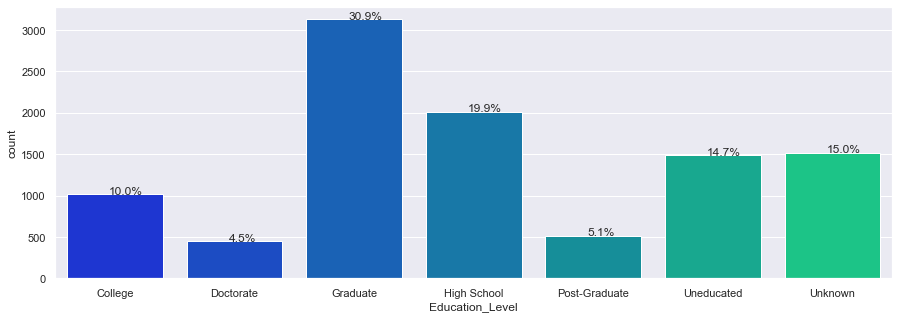

In [115]:
#Plot barplot by using sns countplot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Education_Level"],palette='winter')
perc_on_bar(ax,bank_ch["Education_Level"])

 * 30.9% of the customers are Graduate. There 15% unknown, that is kind of high.

## Observations on Marital_Status

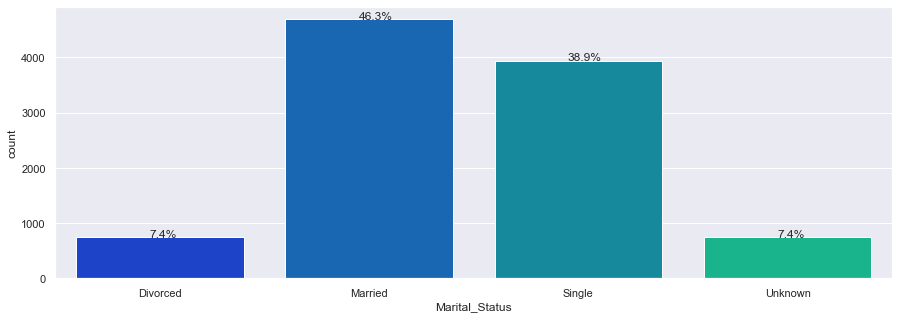

In [116]:
#Plot barplot by using sns countplot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Marital_Status"],palette='winter')
perc_on_bar(ax,bank_ch["Marital_Status"])

 * 46.3% of the customers are married. 38.9% are single. 7.4% unknown

## Observations on Income_Category

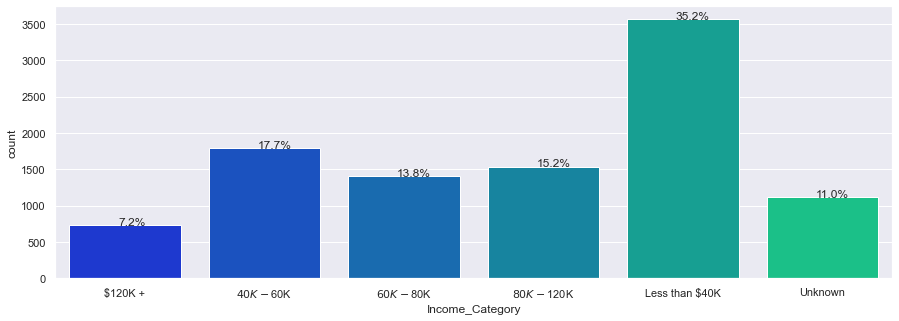

In [117]:
#Plot barplot by using sns countplot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Income_Category"],palette='winter')
perc_on_bar(ax,bank_ch["Income_Category"])

 * 35.2% of the customers are low-income of less than 40K. Only 7.2% have more than 120K income. 11% unknown values

## Observations on Card_Category

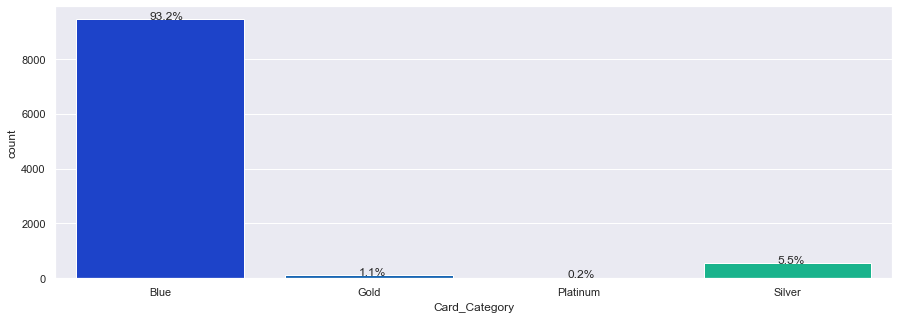

In [118]:
#Plot barplot by using sns countplot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Card_Category"],palette='winter')
perc_on_bar(ax,bank_ch["Card_Category"])

 * Majority, 93.2% of the customers have blue(low rated) card. 5.5% have silver.Golld 1.1%, Platinum(highest rated) only 0.2%

## Observations on Total_Relationship_Count

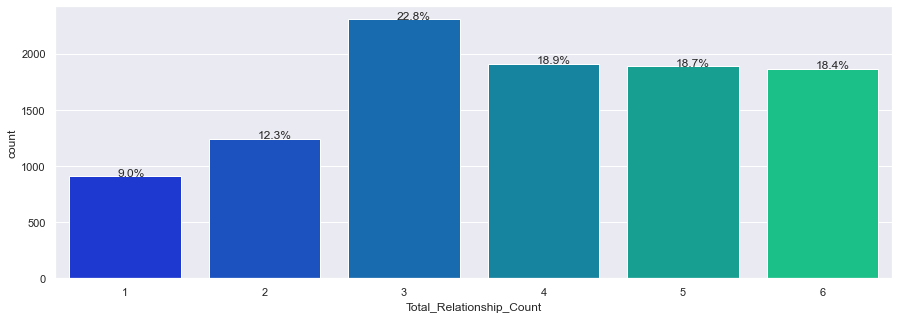

In [119]:
#Plot barplot by using sns countplot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Total_Relationship_Count"],palette='winter')
perc_on_bar(ax,bank_ch["Total_Relationship_Count"])

 * 22.8% of the customers have 3 products. 18.9% have 4, 18.7% have 5, 18.4% have 6 products, 9% have 1.

## Observations on Months_Inactive_12_mon

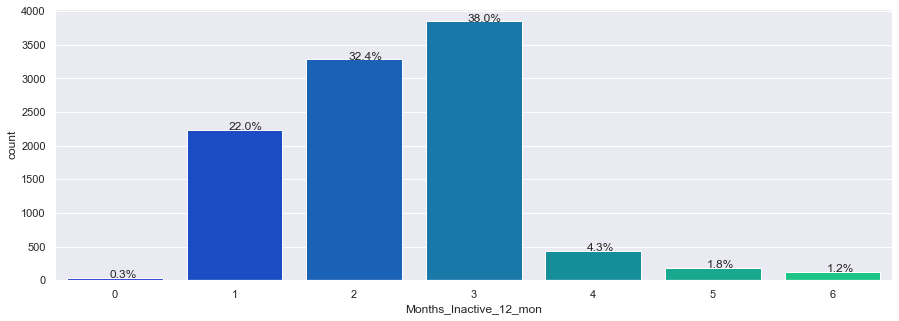

In [120]:
#Plot barplot by using sns countplot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Months_Inactive_12_mon"],palette='winter')
perc_on_bar(ax,bank_ch["Months_Inactive_12_mon"])

 * Majority of the customers were inactive either 3,2, or 1 month only. 0.3% were never inactive. 1.2% were inactive for 6 months.

## Observations on Contacts_Count_12_mon

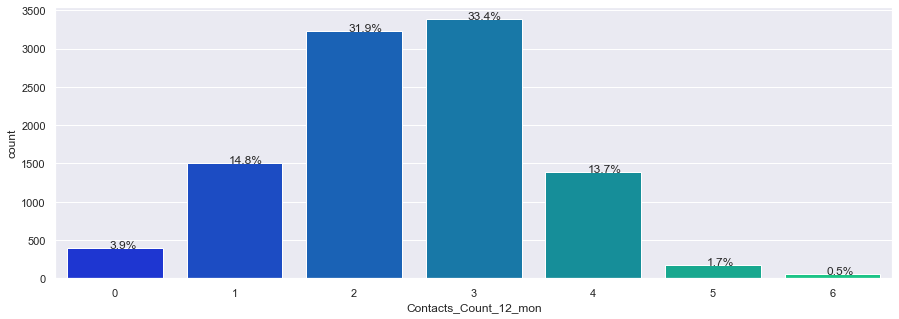

In [121]:
#Plot barplot by using sns countplot and calling theabove function.
plt.figure(figsize=(15,5))
ax = sns.countplot(bank_ch["Contacts_Count_12_mon"],palette='winter')
perc_on_bar(ax,bank_ch["Contacts_Count_12_mon"])

 * Majority of the customers contacted 2 or 3 times. only 0.5% did 6 times.3.9% never contacted.

## EDA

### Univariate box plot and histogram

In [122]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

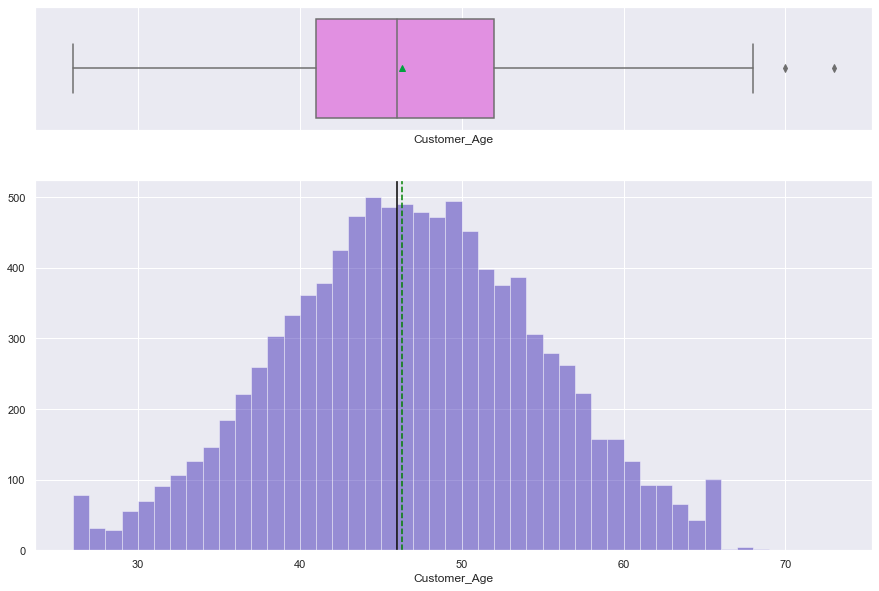

In [123]:
# Observations on Customer_age
histogram_boxplot(bank_ch["Customer_Age"])

- As per the boxplot, there are only 2 outliers in 'Customer_Age' variable on the high side
- Age has a fairly normal distribution with approx equal mean and median

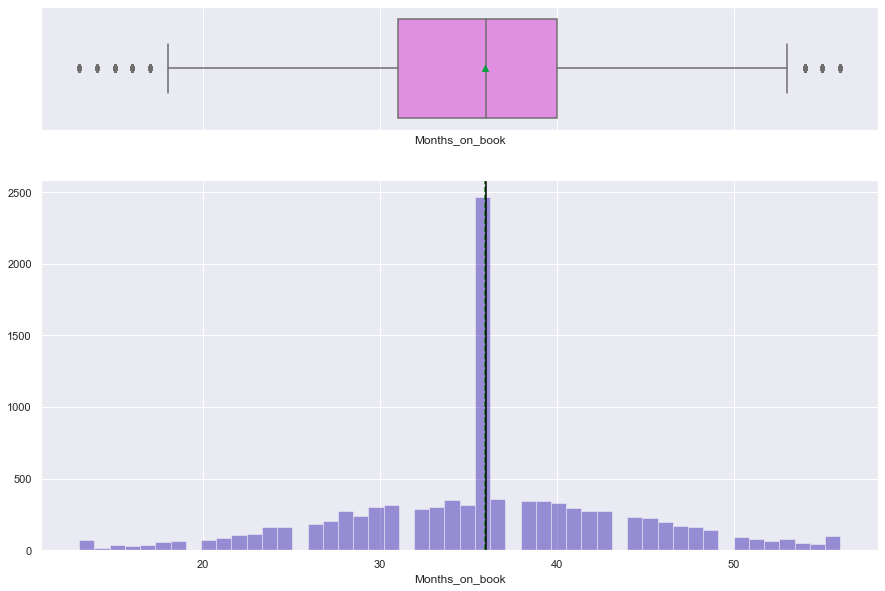

In [124]:
# Observations on Months_on_book
histogram_boxplot(bank_ch["Months_on_book"])

- As per the boxplot, there are few outliers in the 'Months On Book' variable on both sides
- It has a normal distribution except for the very steep frequency in the middle. The mean and median are equal.

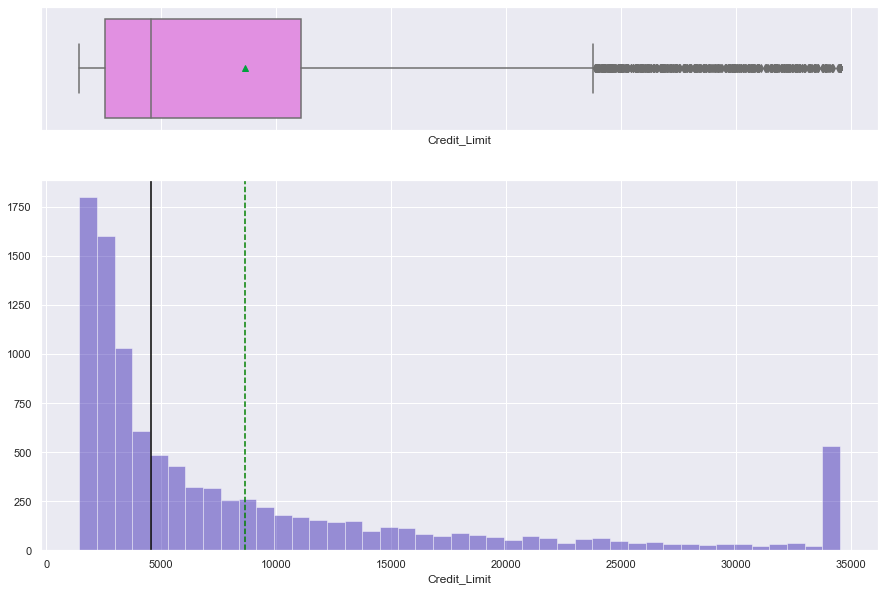

In [125]:
# Observations on Credit_Limit
histogram_boxplot(bank_ch["Credit_Limit"])

- The distribution for Credit limit is highly skewed to the right
- As median of the distribution is less than 5000, more than 50% of customers have spent less than 5000.
- There are lot outliers on the right end of the boxplot. Scaling needs to be applied.

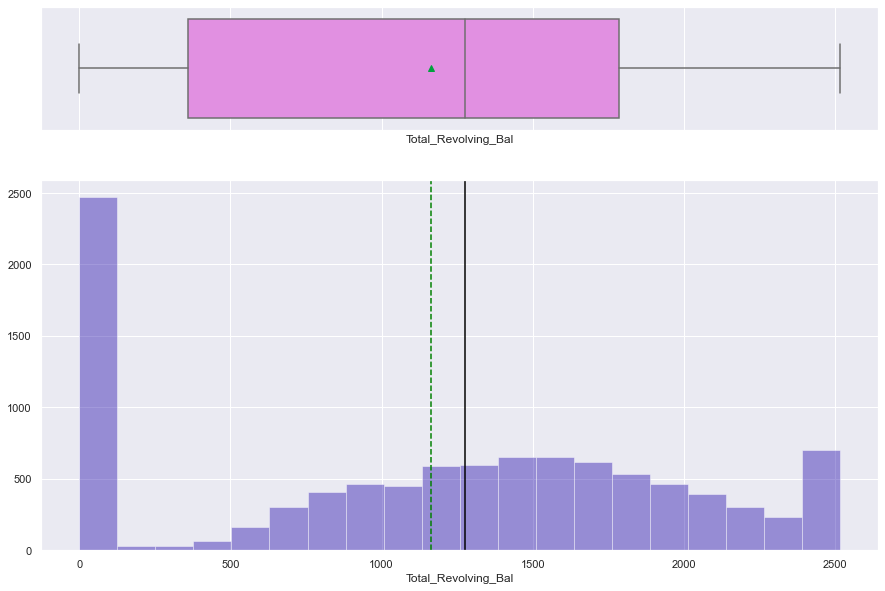

In [126]:
# Observations on Total_Revolving_Bal
histogram_boxplot(bank_ch["Total_Revolving_Bal"])

- The distribution for Total Revolving Balance is left skewed as per box plot. Lot of customers seem to have 0 or close to 0 revolving balance.
- The mean is around 1200 and median is around 1250 .
- There are no outliers.

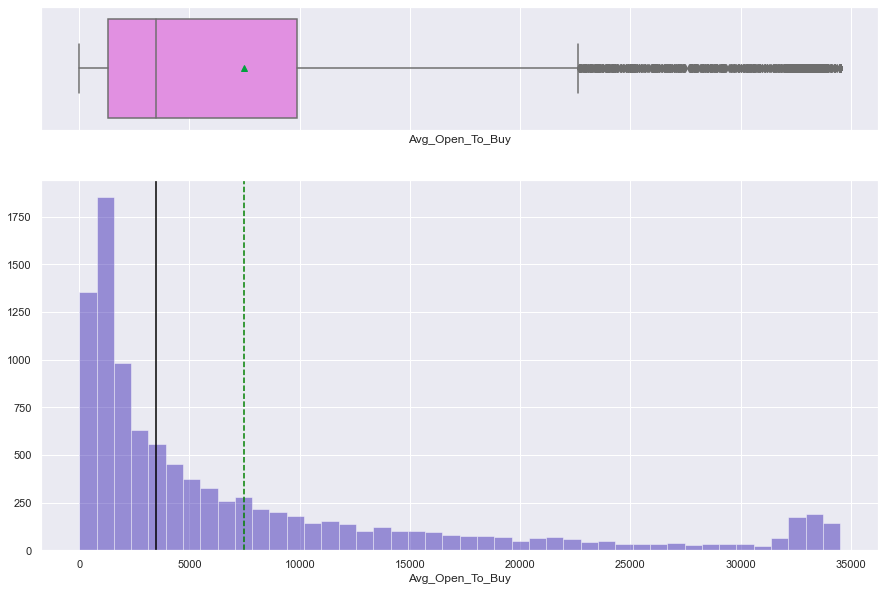

In [127]:
# Observations on Avg_Open_To_Buy
histogram_boxplot(bank_ch["Avg_Open_To_Buy"])

- The distribution for "Avg_Open_To_Buy" is right skewed. 
- 50% of  customers have 4000 or below "Avg_Open_To_Buy" credit line. Some outliers have upto 35000 open to buys credit line.
- There are lot of outliers to the right.

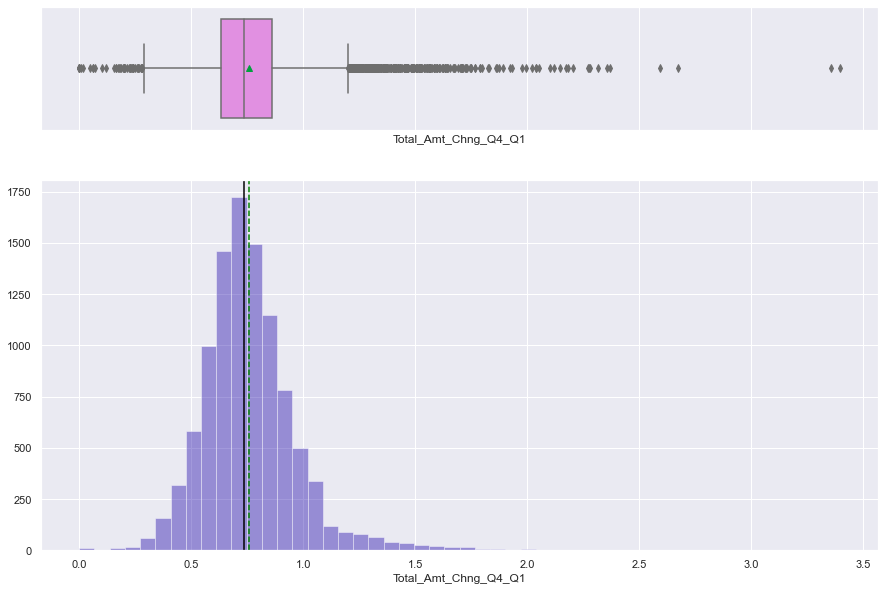

In [128]:
# Observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(bank_ch["Total_Amt_Chng_Q4_Q1"])

- The distribution for "Total_Amt_Chng_Q4_Q1" almost normal ditribution 
- Although, there are many outliers both to the right and left. Can be scaled.
- There are more outliers to the right.

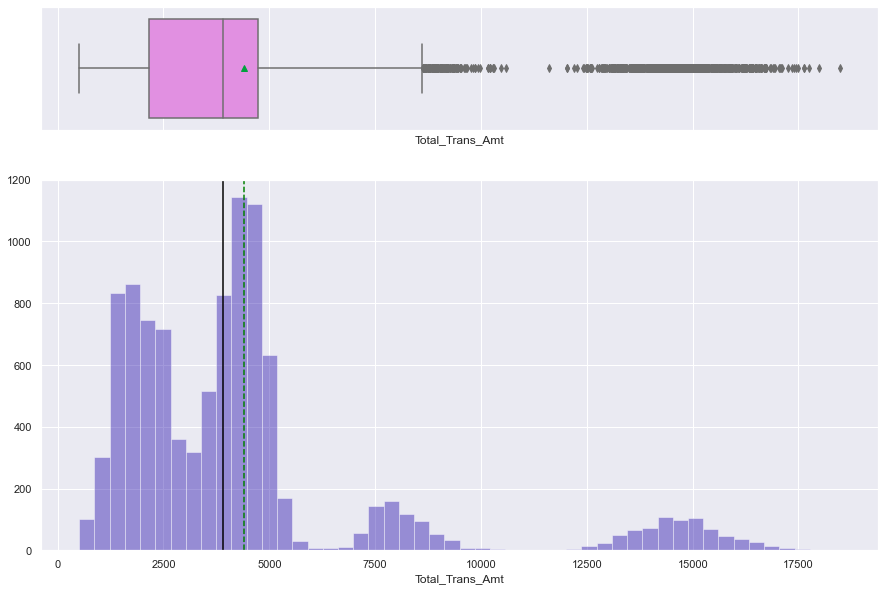

In [129]:
# Observations on Total_Trans_Amt
histogram_boxplot(bank_ch["Total_Trans_Amt"])

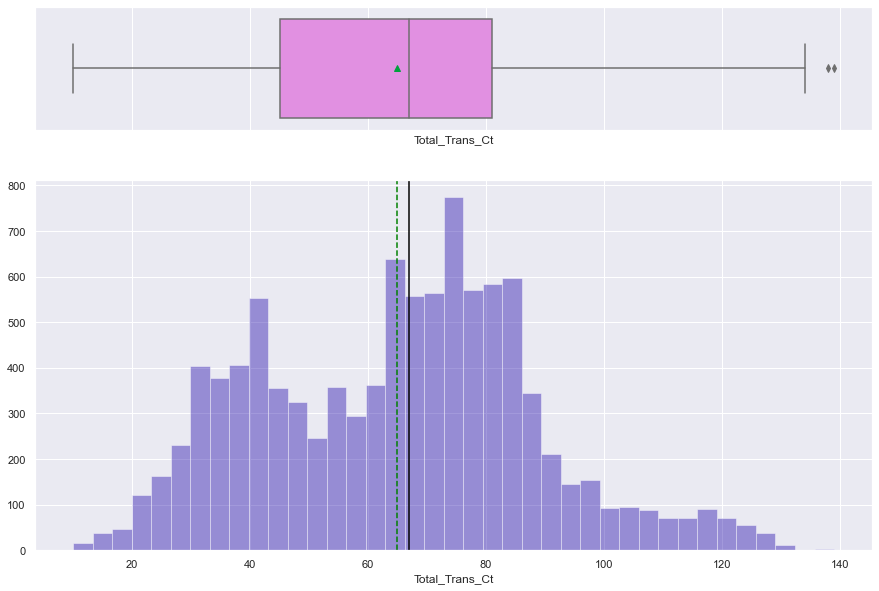

In [130]:
# Observations on Total_Trans_Ct
histogram_boxplot(bank_ch["Total_Trans_Ct"])

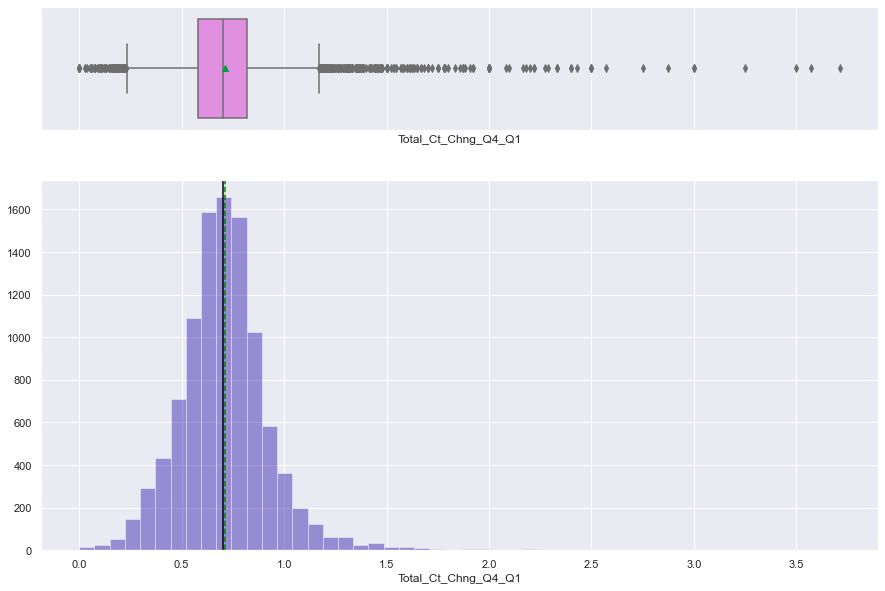

In [131]:
# Observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(bank_ch["Total_Ct_Chng_Q4_Q1"])

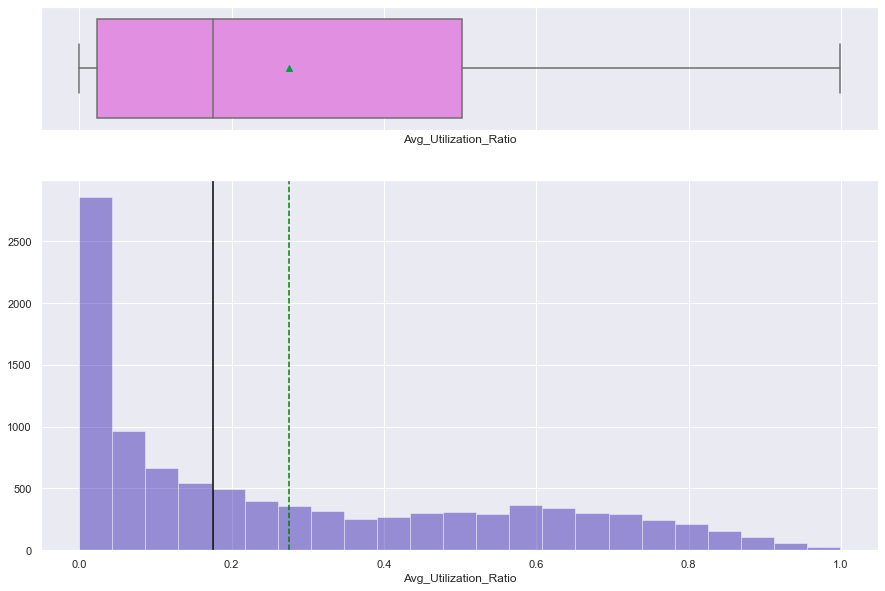

In [132]:
# Observations on Avg_Utilization_Ratio
histogram_boxplot(bank_ch["Avg_Utilization_Ratio"])

## Bivariate Analysis

In [133]:
## Function to plot stacked bar chart for categorical columns versus Target variable
## Using crosstab function and bar plot to plot it
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,bank_ch['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,bank_ch['Attrition_Flag'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


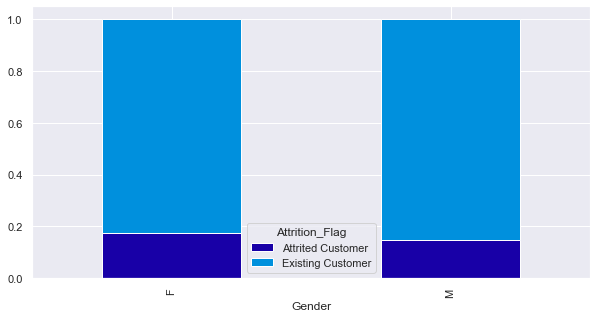

In [134]:
#Calling the function for Gender
stacked_plot(bank_ch['Gender'])

* Attrition is uniform among the genders.

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


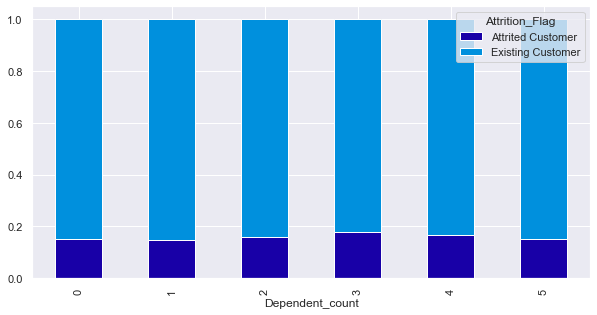

In [135]:
#Calling the function by passing Dependent_count
stacked_plot(bank_ch['Dependent_count'])

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


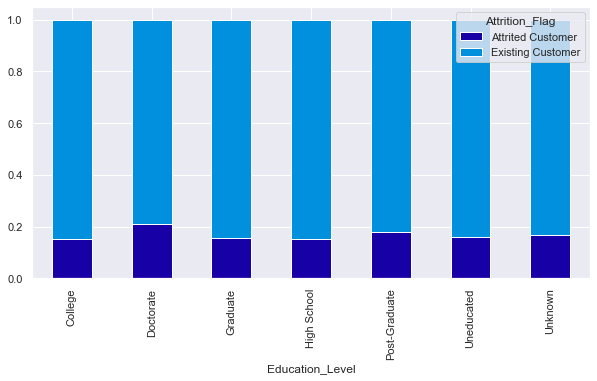

In [136]:
#Calling the function by passing each categorical variable
stacked_plot(bank_ch['Education_Level'])

* Highest Attrition Rate is among the highly educated such as Doctorate, Post-Graduate etc.

* Highest Attrition Rate is among those customers with 2 products.

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


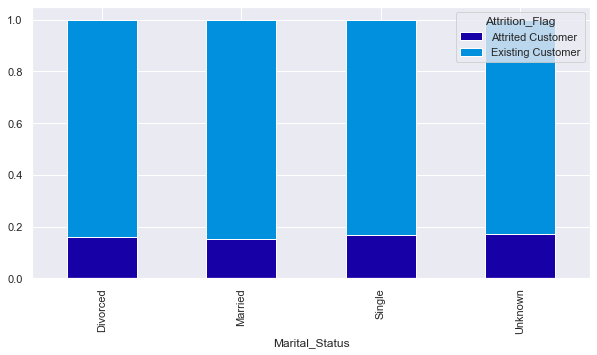

In [137]:
#Calling the function by passing each categorical variable
stacked_plot(bank_ch['Marital_Status'])

* Attrition rate is uniform among the different marital status..

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


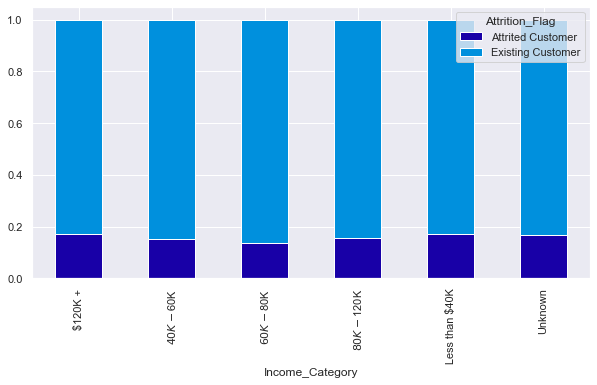

In [138]:
#Calling the function by passing each categorical variable
stacked_plot(bank_ch['Income_Category'])

* Attrition rate is higher among customers with less than 40K income and those with income unknown.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


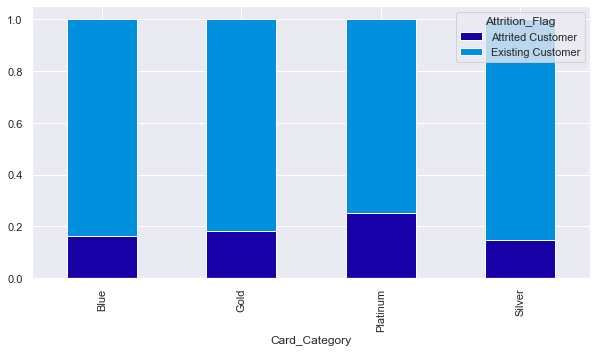

In [139]:
#Calling the function by passing each categorical variable
stacked_plot(bank_ch['Card_Category'])

* Attrition rate is highest among Platinum card holders.

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


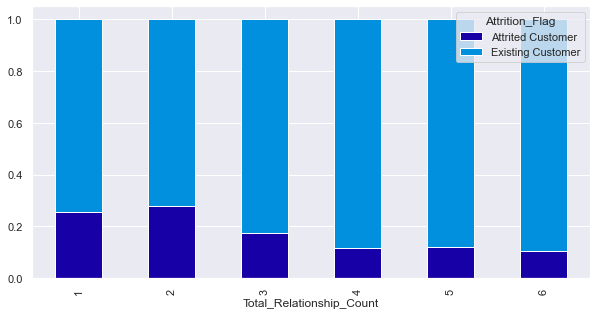

In [140]:
#Calling the function by passing each categorical variable
stacked_plot(bank_ch['Total_Relationship_Count'])

* Highest Attrition Rate is among those customers with 2 products.

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


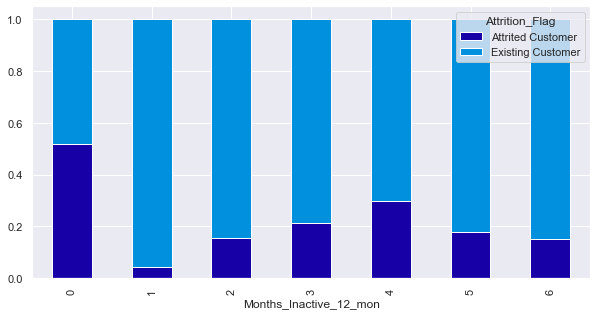

In [141]:
#Calling the function by passing each categorical variable
stacked_plot(bank_ch['Months_Inactive_12_mon'])

* Highest Attrition Rate is among those with 0 inactivity past year. That's just odd. May be this field shows months people were active. If these were active for 0 months(never active) they are likely to leave. But on the other hand only very few were inactive for 0 months(always active). 29 from which 15 attrited. So we can ignore that anomaly.  

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


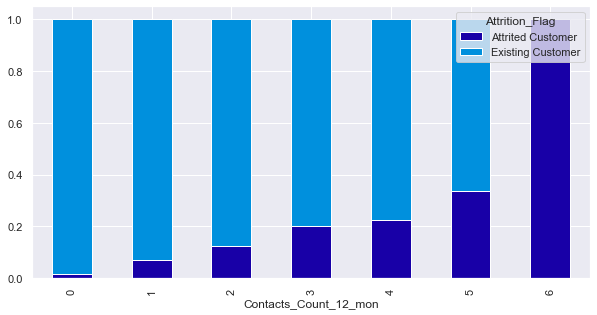

In [142]:
#Calling the function by passing each categorical variable
stacked_plot(bank_ch['Contacts_Count_12_mon'])

* Highest Attrition Rate is among those who contacted 6 times. That's way higher than other values. There is a gradual increase in attrition rate when number of contacts goes from 0-5. More contacts is an indicator of attrition.

In [436]:
## Checking for columns in the dataframe.
bank_ch.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

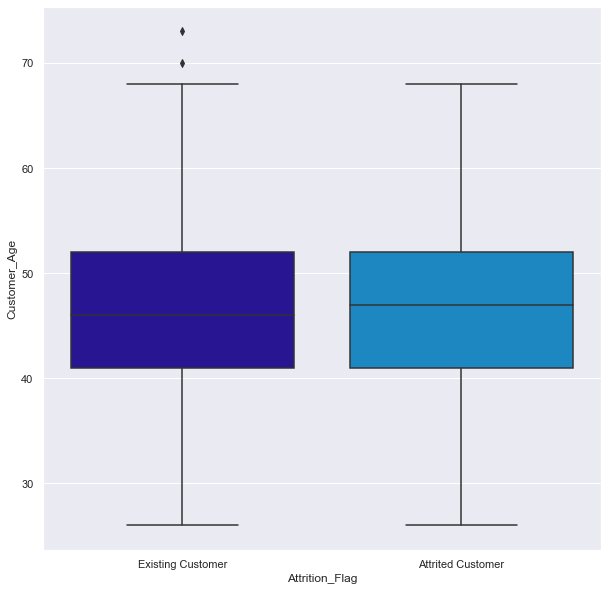

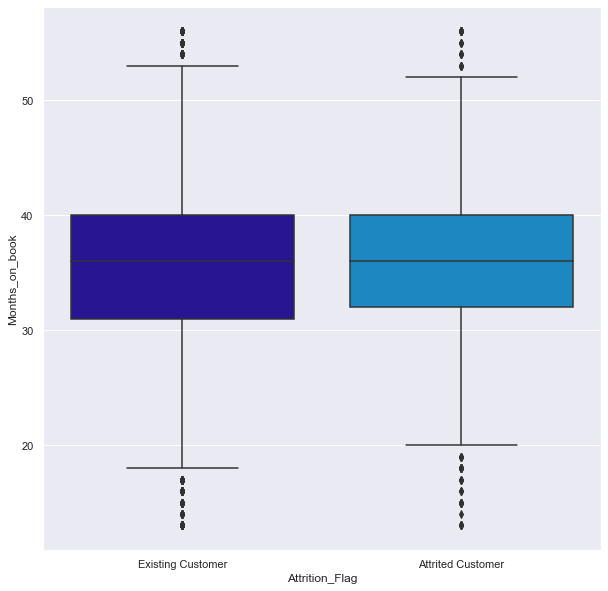

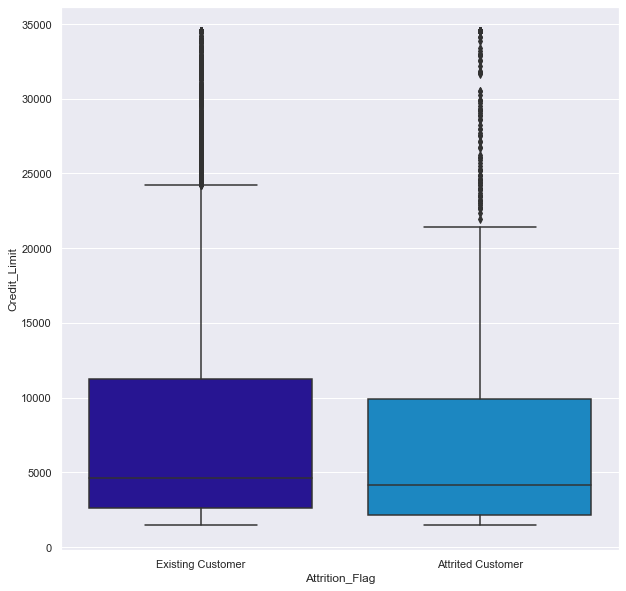

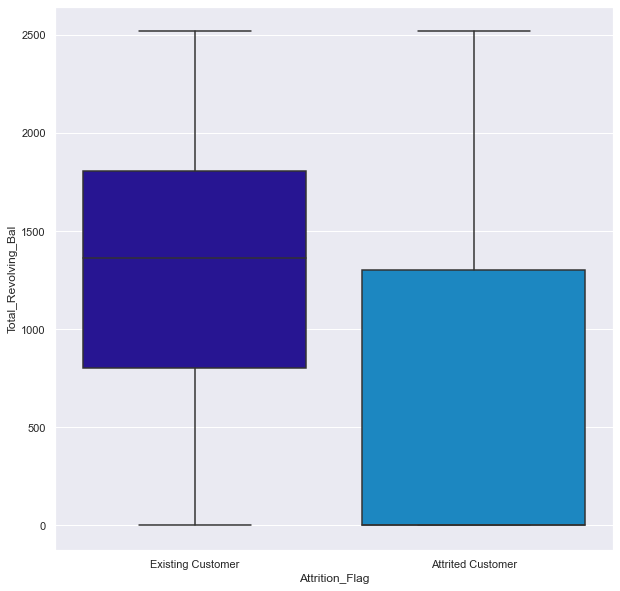

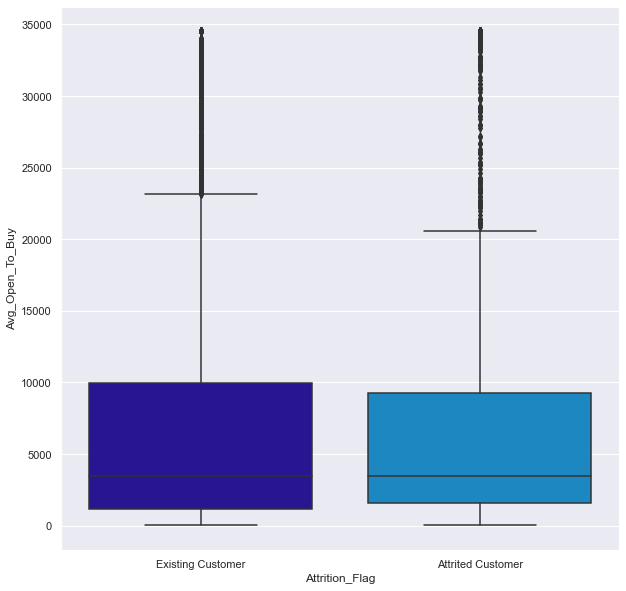

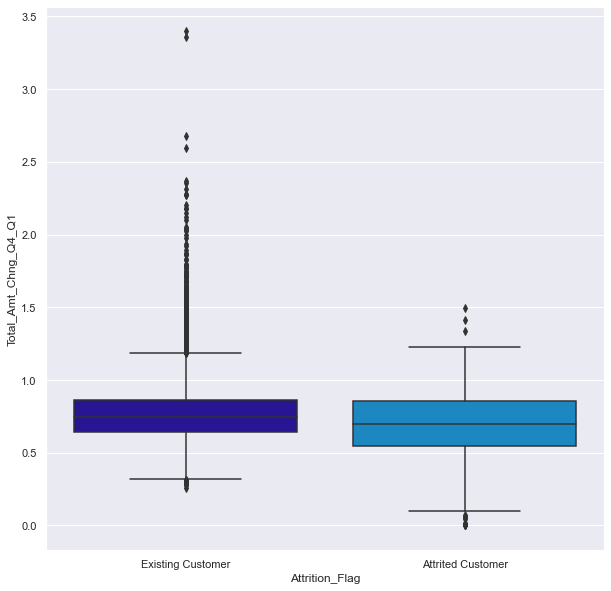

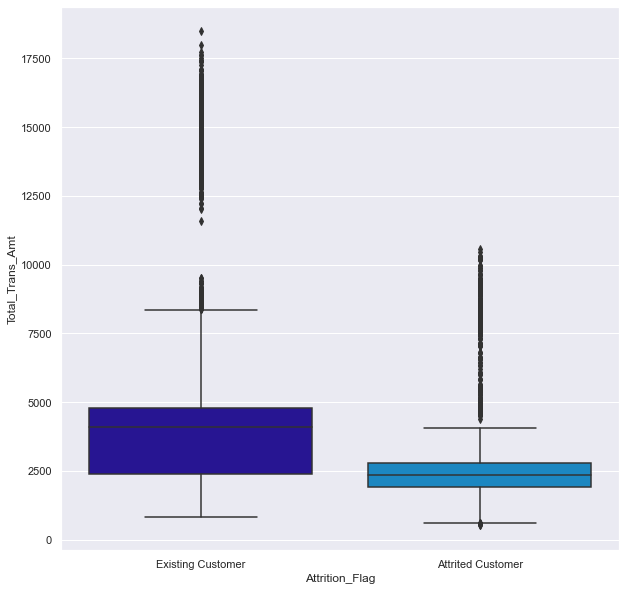

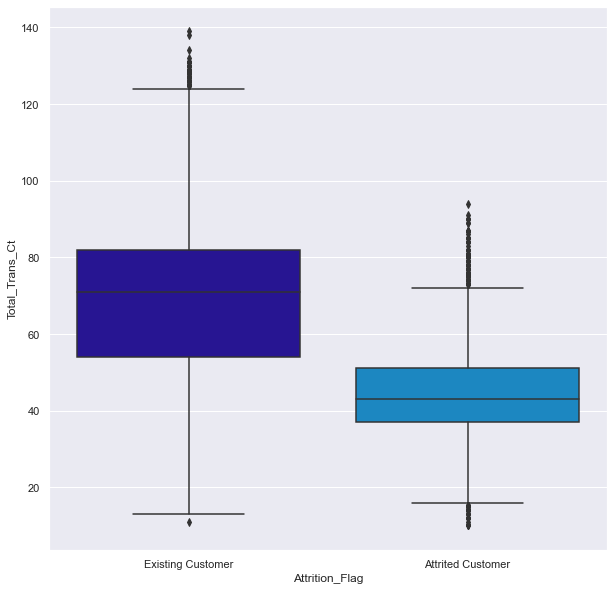

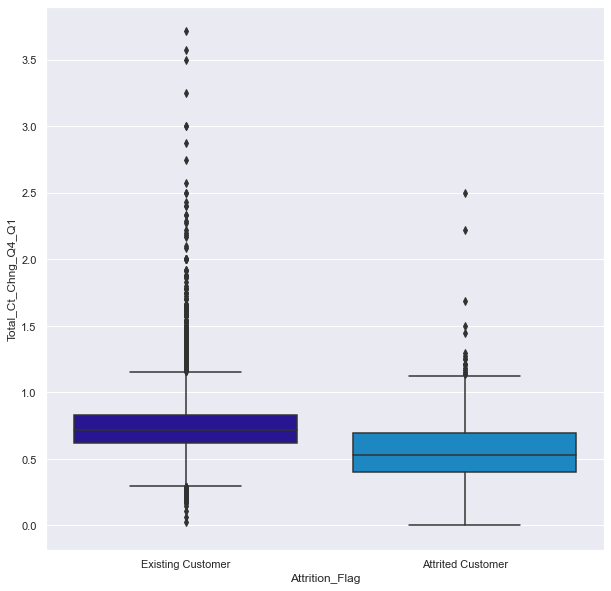

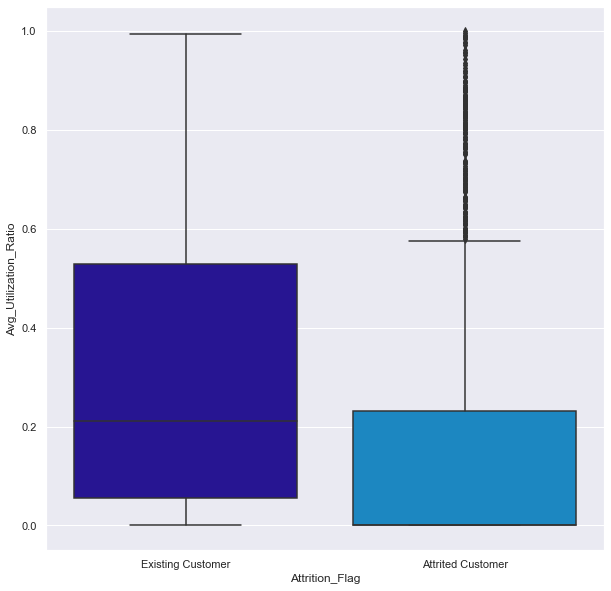

In [438]:
#Box plot of Target variable versus continuous variables
# By running the for loop using column names, coding is concise nand all plots are visible in one window.
for i in ['Customer_Age','Months_on_book','Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=bank_churn,x='Attrition_Flag',y=i)
    plt.show()

### Insights: 
* Distribution of age versus Attiriton_flag is almost similar for both existing and attrited cutomers. Older than 68 folks 
  don't seem to churn. Approximately 40 to 52 age group are the majority churners. They are also  majority of existing cutomers.
* Months on book, churners are mostly between values 32-40, so are non-churners-only slight difference 31-40. Both have outliers on both lower and higher ends.
* Credit limit, churners mostly 10,000 and under with some outliers all the way up.
* Total Revolving balance, 0 - 800 are majority churners, non-churners are above 800, churners are also concentrated upto 1300.
* Average open to buy, majority churners are from 0 to little less than 10,000. Non churners have si,ilar distribution. Both have outliers on the high end.
* Total amt Change between Q1 and Q4, for most attrited customers,0.5- 0.9, non-churners are above 0.7. above 1.5 they don't seem to churn. The higher this value the better for business
* Total transaction amt, most attrited customers are around 2500, fwe are above that, but majority are non-churners above that. above 10,000 only non-churners. The higher this value the better for business
* Less than 50 total_trans_cnt is mostly churners. Above that mostly non_churners. above 100 no more churning.
* Change in Transaction Count (Q4 over Q1) , majority churners are below 0.6. Above that mostly staying cutomers. Greater than 2.5 no more lost business. ).6 to 0.8 are majority non-churners.Non-churners have outliers upto 3.5 and beyond.
* Average Card Utilization Ratio, how much of credit limit is used, average it over 12 months. If this is low , then likely that business will be lost.Most churners are from 0 to 0.2. Although outliers are all the way till 1.The values from 0.05 to 0.5 are majority staying customers


## Pair Plot to show the relation between features.

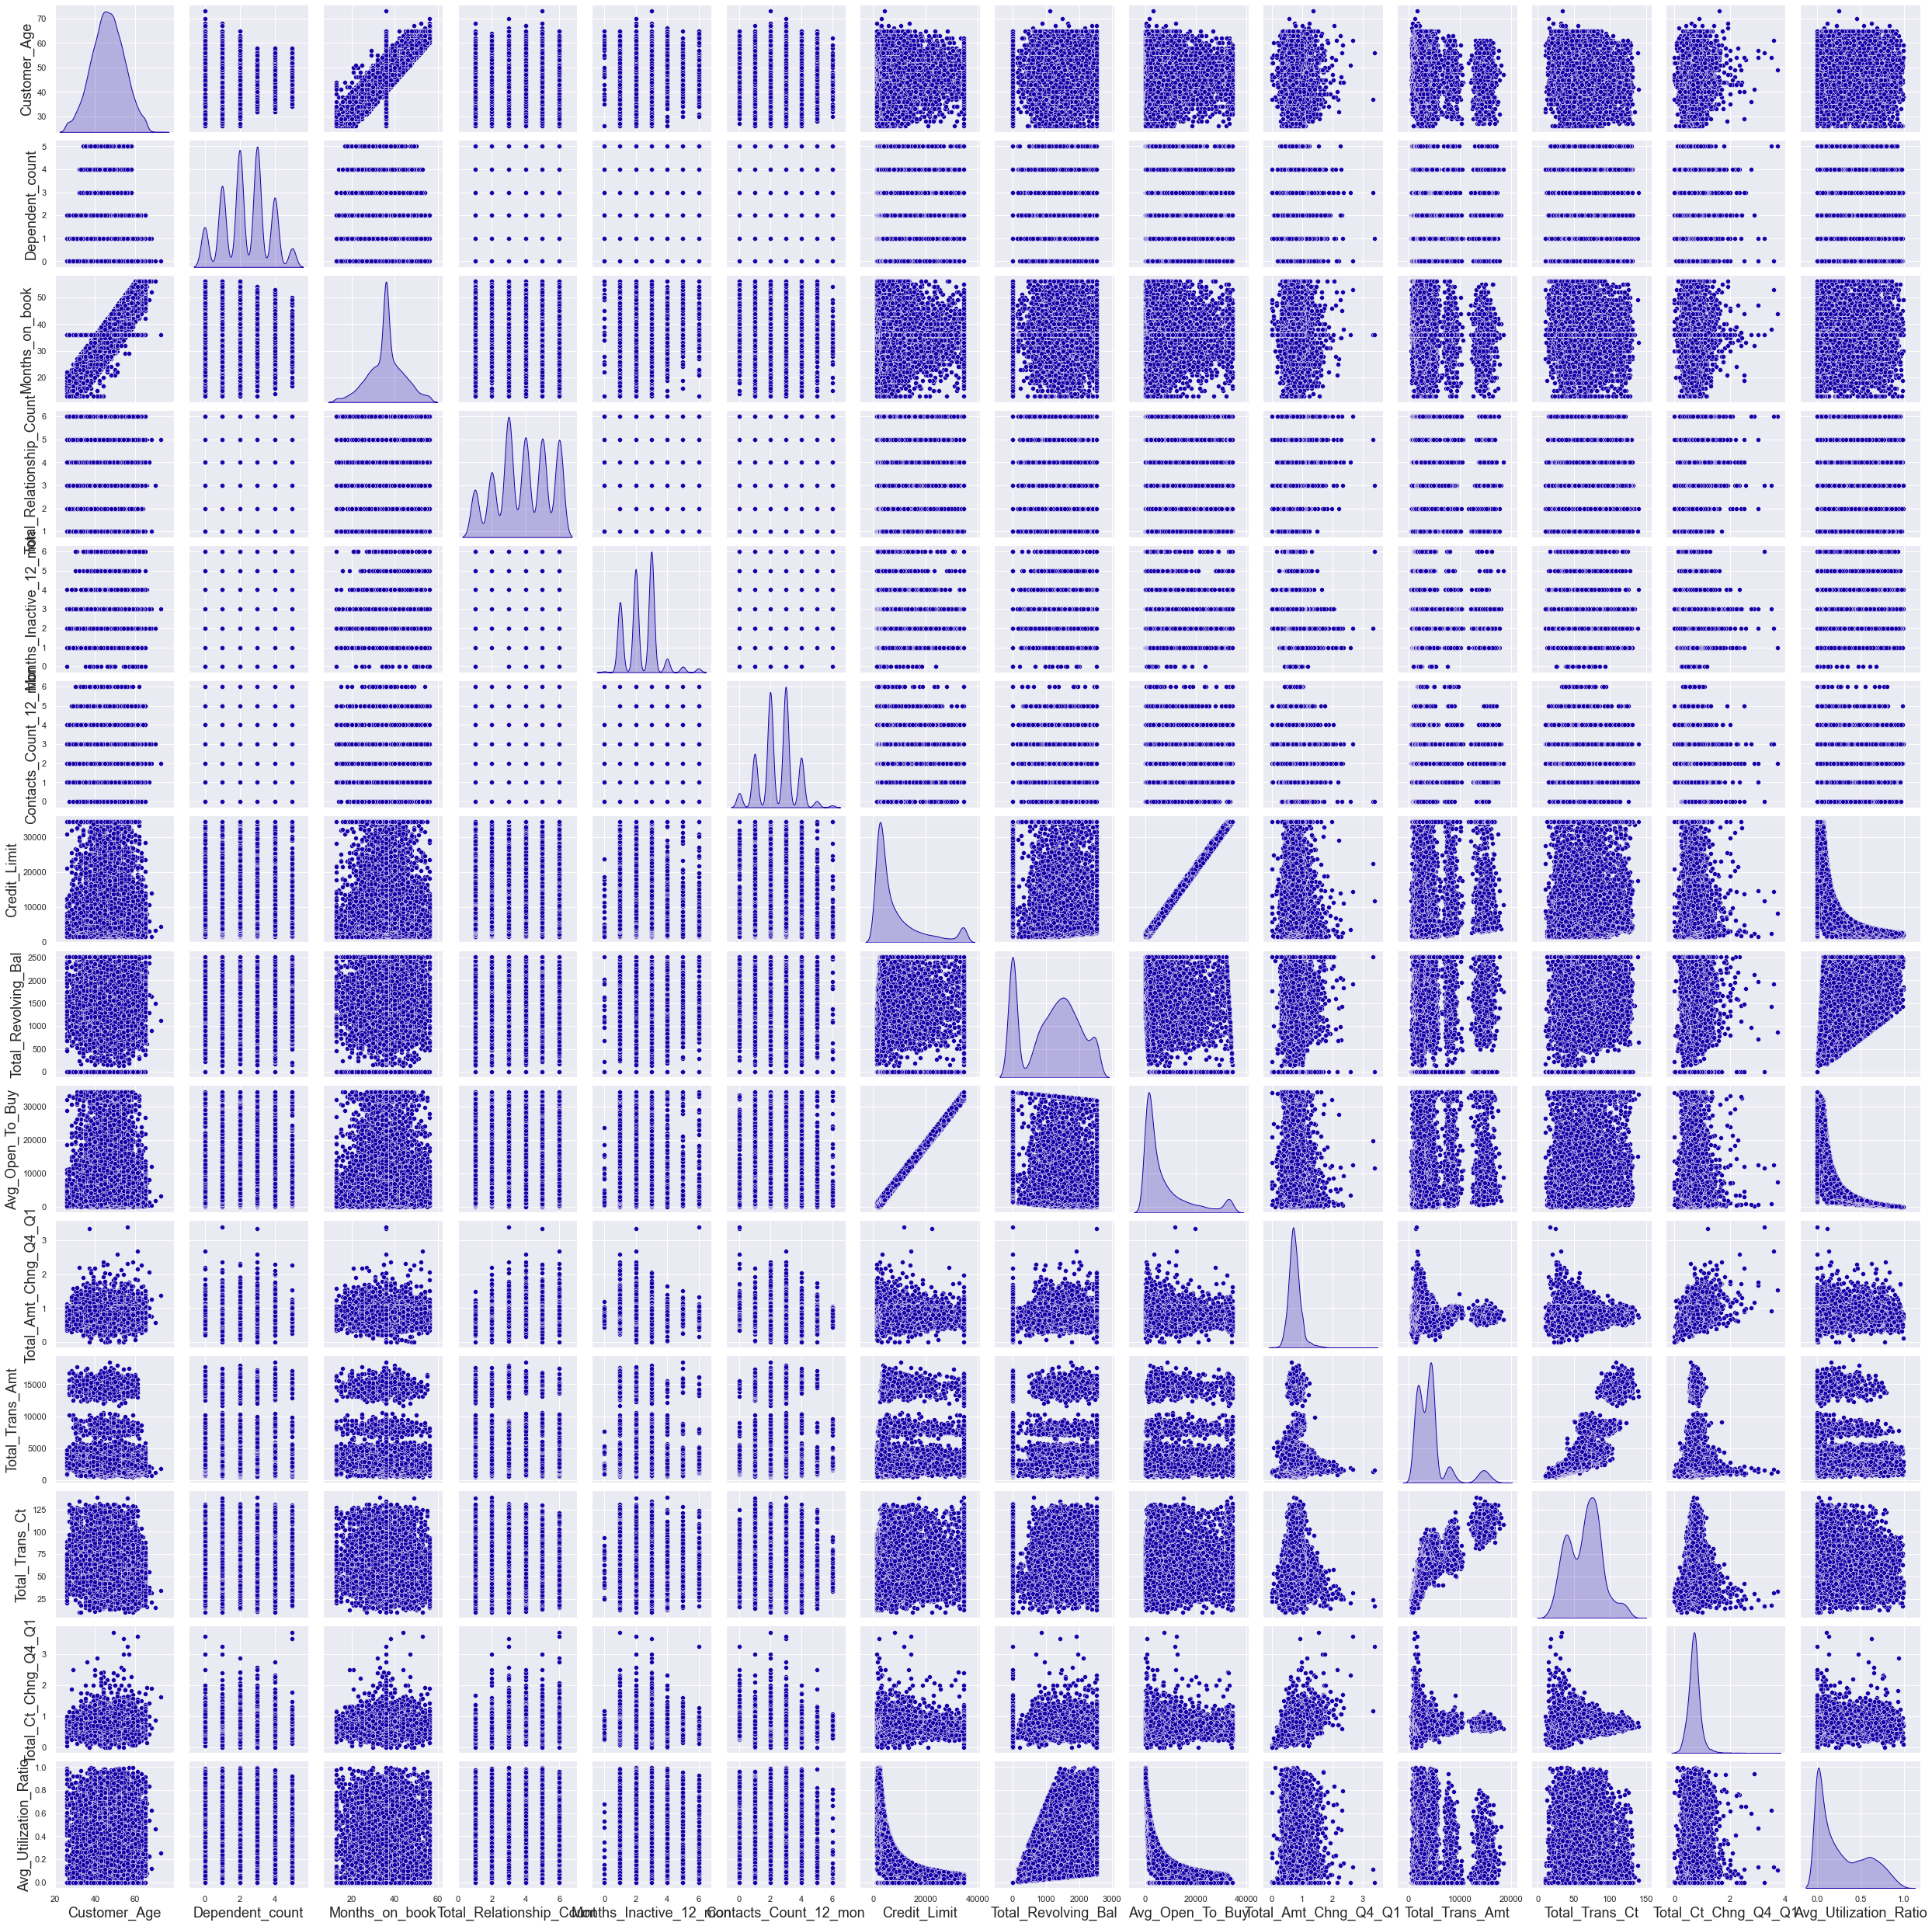

In [143]:
plot=sns.pairplot(bank_ch , diag_kind = 'kde')
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=18)
    m = ax.get_ylabel()
    ax.set_ylabel(m, fontsize=18)
plt.show()


* There seems to be linear relation between:
  -   1. Customer_Age and Months_on_book
  -   2. Credit_limit and Avg_Open_to_Buy
* no other prominent relations are found.

## Before plotting the heat map, converting the target variable, Attrition_Flag to numeric, so we can see the correlation between other features and the target variable. 

In [144]:
#Converting "Existing Customer" values to 0 and 'Attrited Customer' values to 1 in target column, Attrition_Flag
Att_Fl = {'Existing Customer':0, 'Attrited Customer':1}
bank_ch['Attrition_Flag']=bank_ch['Attrition_Flag'].map(Att_Fl)

In [145]:
#Converting it to integer so it can be plotted in heat map to see the correlations.
bank_ch["Attrition_Flag"] = bank_ch["Attrition_Flag"].astype("int64")

In [146]:
#After converting verifying the value_counts.
bank_ch['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

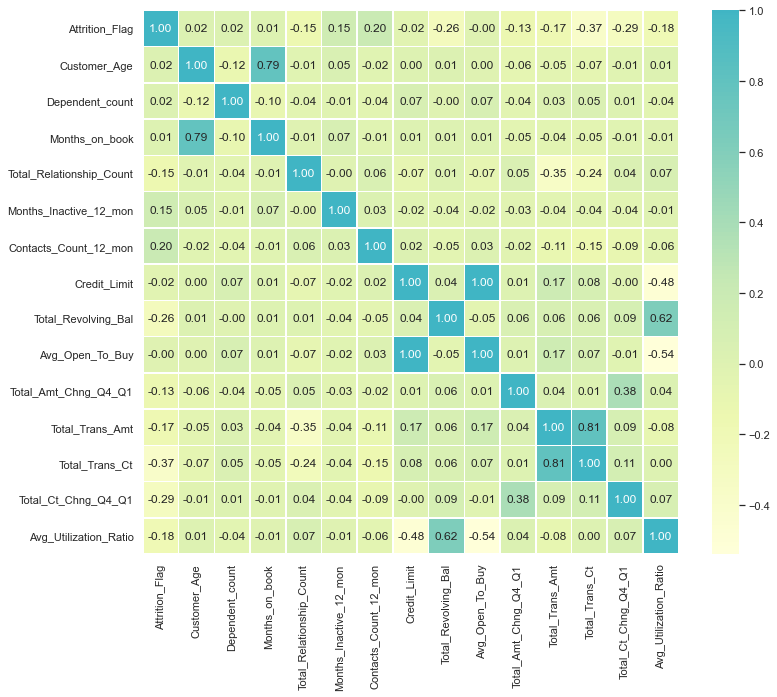

In [147]:
# heatmap of correlation between differnt numerical features.
#Darker the color higher the correlation
plt.figure(figsize=(12,10))
sns.heatmap(bank_ch.corr(), annot=True, linewidths=.5, cmap="YlGnBu", fmt="0.2f", center = 1 )  
plt.show()

- As seen, credit_limit and avg_open_to_buy has perefect correlation. so one of the fields can be dropped.
- As expected,Total_Revolving_Bal and Avg_Utilization_Ratio are highly correlated.
- Avg_Utilization_Ratio has high negative correlation with both credit_limit and avg_open_to_buy. This is expected.
- Customer_age has high correlation with Months_On_Book and is expected.
- Attrition rate has some correlation with Total_trans_count, Total_Ct_Chng_Q4_Q1 and revolving_Bal in that order of strength of correlation.

## Illustrate the insights based on EDA

   ###      The insights based on EDA are given throughout the EDA section above.

## Data Pre-processing

* Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling

* There are lot of unknown values in 'Education_Level' (15%), 'Marital_Status'(7.4%), 'Income_Category'(11%)
* It will not be a good approach to drop these rows as that will be a lot of data.
* So we will replace them with most occuring values, as they are all ctaegorical columns.

In [148]:
#checking unique values
bank_ch["Marital_Status"].unique()

['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Married', 'Single', 'Unknown', 'Divorced']

In [149]:
#Checking value counts of columns with "unknown" values
unk_cols = ['Education_Level','Marital_Status','Income_Category']
for column in unk_cols:
    print(bank_ch[column].unique())
    print('-'*30)
    print(bank_ch[column].value_counts())
    print('-'*30)

['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Married', 'Single', 'Unknown', 'Divorced']
------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Categories (6, object): ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
------------------------------
Less than $40K    3561
$40K 

* Since below categorical columns have seemingly ordinal values. Encoding them manually.

In [150]:
#Encoding values to numeric ordinal values. When doing this since unknown is not specified, they will be replaced by nulls.
education = {'Uneducated':1,'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}
bank_ch['Education_Level'] = bank_ch['Education_Level'].map(education)

marital_st = {'Married':1,'Single':2, 'Divorced':3 }
bank_ch['Marital_Status'] = bank_ch['Marital_Status'].map(marital_st)

income_cat = {'Less than $40K':1,'$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
bank_ch['Income_Category'] = bank_ch['Income_Category'].map(income_cat)

In [151]:
#Checking their value counts again to see the new values
coded_cols = ['Education_Level','Marital_Status','Income_Category']
for column in coded_cols:
    print(bank_ch[column].unique())
    print('-'*30)
    print(bank_ch[column].value_counts())
    print('-'*30)

[ 2.  4.  1. nan  3.  5.  6.]
------------------------------
4.0    3128
2.0    2013
1.0    1487
3.0    1013
5.0     516
6.0     451
Name: Education_Level, dtype: int64
------------------------------
[ 1.  2. nan  3.]
------------------------------
1.0    4687
2.0    3943
3.0     748
Name: Marital_Status, dtype: int64
------------------------------
[ 3.  1.  4.  2.  5. nan]
------------------------------
1.0    3561
2.0    1790
4.0    1535
3.0    1402
5.0     727
Name: Income_Category, dtype: int64
------------------------------


In [152]:
#Duplicated if any
df=bank_ch.duplicated()
df.sum()

0

* No duplicated rows

In [153]:
## First Splitting the data before imputing or scaling. Y is target(dependent) variable. X has independent variables

X=bank_ch.drop("Attrition_Flag", axis=1)
Y=bank_ch["Attrition_Flag"]
X.head()

Customer_Age Gender  Dependent_count  Education_Level  Marital_Status  \
0            45      M                3              2.0             1.0   
1            49      F                5              4.0             2.0   
2            51      M                3              4.0             1.0   
3            40      F                4              2.0             NaN   
4            40      M                3              1.0             1.0   

   Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0              3.0          Blue              39                         5   
1              1.0          Blue              44                         6   
2              4.0          Blue              36                         4   
3              1.0          Blue              34                         3   
4              3.0          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [154]:
# Dropping avg_open_to_buy column as credit_limit and avg_open_to_buy have perfect correlation.
# We can test the performance with dropping and without dropping beacsue even though they are correlated, they are 2 
# different type of information credit_limit is the limit on the credit card upto which cutomers can spend.
# avg_open_to_buy is amount left on the credit limit after what the cusomers spent, this column may be a better indicator
# of attrition. credit_limit is also imporatnt

X.drop(
    columns=[
        "Avg_Open_To_Buy"
    ],
    inplace=True,
)

In [155]:
#Now splitting into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1,stratify=Y)

In [156]:
#verifying their sizes.
print(X_train.shape, X_test.shape)

(7088, 18) (3039, 18)


In [157]:
# Check values and counts before imputing. Showing nulls.
print(X_train['Education_Level'].value_counts())
print(X_train['Education_Level'].unique())

4.0    2177
2.0    1425
1.0    1031
3.0     709
5.0     364
6.0     312
Name: Education_Level, dtype: int64
[ 4. nan  3.  1.  2.  6.  5.]


In [1]:
#Nulls will be replaced by most occuring values,
imp = SimpleImputer(strategy="most_frequent")
### impute after splitting data

NameError: name 'SimpleImputer' is not defined

In [159]:
## Imputing missing values in Test and train datasets seprately.

#Fit and impute train data
Imp_cols = ['Education_Level','Marital_Status','Income_Category']
X_train[Imp_cols]=imp.fit_transform(X_train[Imp_cols]) 

#Transform the test data 
X_test[Imp_cols]=imp.fit_transform(X_test[Imp_cols]) 

In [160]:
# Check values and counts after imputing. No more nulls. Value counts increased for majority value.
print(X_train['Education_Level'].value_counts())
print(X_train['Education_Level'].unique())

4.0    3247
2.0    1425
1.0    1031
3.0     709
5.0     364
6.0     312
Name: Education_Level, dtype: int64
[4. 3. 1. 2. 6. 5.]


In [161]:
##One hot encoding of categorical columns.new columns will be generated with numeric values.
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
print(X_train.shape, X_test.shape)

(7088, 22) (3039, 22)


In [162]:
# Check X_train after encoding. First, Set option to show all columns so none of the coded columns or others will be hidden.
pd.set_option('display.max_columns', None)

X_train.head(10)

Customer_Age  Dependent_count  Education_Level  Marital_Status  \
4124            50                1              4.0             1.0   
4686            50                0              4.0             3.0   
1276            26                0              4.0             2.0   
6119            65                0              3.0             2.0   
2253            46                3              4.0             2.0   
2995            50                4              4.0             1.0   
5835            56                4              1.0             2.0   
9592            32                0              2.0             2.0   
5535            61                0              4.0             1.0   
1610            52                1              4.0             1.0   

      Income_Category  Months_on_book  Total_Relationship_Count  \
4124              1.0              43                         6   
4686              3.0              36                         3   
1276              2.0              13                         6   
6119              1.0              55                         3   
2253              4.0              35                         6   
2995              3.0              36                         5   
5835              1.0              51                         5   
9592              1.0              21                         2   
5535              1.0              55                         4   
1610              5.0              44                         6   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
4124                       1                      2        7985.0   
4686                       3                      2        5444.0   
1276                       3                      4        1643.0   
6119                       3                      0        2022.0   
2253                       3                      4        4930.0   
2995                       1                      4       10226.0   
5835                       1                      1        3334.0   
9592                       3                      1        4251.0   
5535                       2                      3        2194.0   
1610                       1                      4        9274.0   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
4124                    0                 1.032             3873   
4686                 2499                 0.468             4509   
1276                 1101                 0.713             2152   
6119                    0                 0.579             4623   
2253                    0                 1.019             3343   
2995                 1638                 1.053             3321   
5835                 1272                 1.120             4284   
9592                 2295                 0.628            15574   
5535                 1512                 0.725             4069   
1610                 2097                 0.776             2048   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  \
4124              72                0.674                  0.000         1   
4686              80                0.667                  0.459         0   
1276              50                0.471                  0.670         1   
6119              65                0.548                  0.000         1   
2253              77                0.638                  0.000         0   
2995              57                1.036                  0.160         0   
5835              73                0.587                  0.382         1   
9592             115                0.797                  0.540         1   
5535              80                0.778                  0.689         1   
1610              59                0.639                  0.226         0   

      Gender_M  Card_Category_Blue  Card_Category_Gold  \
4124         0                   1               

In [163]:
# Check X_test after encoding. Scroll to rightmost to see newly added columns.
X_test.head(10)

Customer_Age  Dependent_count  Education_Level  Marital_Status  \
7403            38                0              4.0             1.0   
2005            39                2              1.0             1.0   
8270            45                4              6.0             1.0   
646             41                3              4.0             2.0   
1690            65                1              4.0             2.0   
7674            42                2              5.0             2.0   
6806            60                0              2.0             2.0   
675             57                4              2.0             1.0   
4263            46                3              5.0             1.0   
6472            41                2              2.0             1.0   

      Income_Category  Months_on_book  Total_Relationship_Count  \
7403              3.0              26                         5   
2005              5.0              26                         2   
8270              4.0              39                         2   
646               4.0              26                         4   
1690              2.0              48                         4   
7674              1.0              35                         6   
6806              2.0              56                         3   
675               4.0              38                         4   
4263              5.0              36                         6   
6472              1.0              36                         6   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
7403                       2                      1        3809.0   
2005                       3                      4        8906.0   
8270                       3                      2        1438.3   
646                        3                      2       11806.0   
1690                       2                      4        4599.0   
7674                       3                      2        3223.0   
6806                       5                      2        2213.0   
675                        1                      3       15428.0   
4263                       1                      2        1438.3   
6472                       2                      2        4953.0   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
7403                 1521                 0.692             4666   
2005                    0                 0.315              809   
8270                 1162                 0.539             4598   
646                  1811                 0.754             1465   
1690                  637                 0.622             2608   
7674                    0                 0.593             4916   
6806                  829                 0.639             4210   
675                  1553                 0.747             1916   
4263                  845                 0.642             3631   
6472                  991                 0.342             4183   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  \
7403              69                0.865                  0.399         0   
2005              15                0.250                  0.000         0   
8270              86                0.623                  0.808         0   
646               31                0.476                  0.153         0   
1690              78                0.592                  0.139         1   
7674              79                0.717                  0.000         1   
6806              84                0.714                  0.375         1   
675               40                0.538                  0.101         0   
4263              67                0.763                  0.587         0   
6472              67                0.489                  0.200         1   

      Gender_M  Card_Category_Blue  Card_Category_Gold  \
7403         1                   1               

In [164]:
## Showing the datatypes of the X_train. 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7088 entries, 4124 to 4752
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              7088 non-null   int64  
 1   Dependent_count           7088 non-null   int64  
 2   Education_Level           7088 non-null   float64
 3   Marital_Status            7088 non-null   float64
 4   Income_Category           7088 non-null   float64
 5   Months_on_book            7088 non-null   int64  
 6   Total_Relationship_Count  7088 non-null   int64  
 7   Months_Inactive_12_mon    7088 non-null   int64  
 8   Contacts_Count_12_mon     7088 non-null   int64  
 9   Credit_Limit              7088 non-null   float64
 10  Total_Revolving_Bal       7088 non-null   int64  
 11  Total_Amt_Chng_Q4_Q1      7088 non-null   float64
 12  Total_Trans_Amt           7088 non-null   int64  
 13  Total_Trans_Ct            7088 non-null   int64  
 14  Total

In [165]:
## Showing the datatypes of the X_test. 
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 7403 to 8523
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              3039 non-null   int64  
 1   Dependent_count           3039 non-null   int64  
 2   Education_Level           3039 non-null   float64
 3   Marital_Status            3039 non-null   float64
 4   Income_Category           3039 non-null   float64
 5   Months_on_book            3039 non-null   int64  
 6   Total_Relationship_Count  3039 non-null   int64  
 7   Months_Inactive_12_mon    3039 non-null   int64  
 8   Contacts_Count_12_mon     3039 non-null   int64  
 9   Credit_Limit              3039 non-null   float64
 10  Total_Revolving_Bal       3039 non-null   int64  
 11  Total_Amt_Chng_Q4_Q1      3039 non-null   float64
 12  Total_Trans_Amt           3039 non-null   int64  
 13  Total_Trans_Ct            3039 non-null   int64  
 14  Total

### **Important - There are many outliers in many features. we will use a scaler in pipleline while building model for treating / standardizing them.

## Building the models

## Model building - Logistic Regression

### Model evaluation criterion:

#### Model can make wrong predictions:
1. Thera Bank is trying to reduce churn rate of customers.
1. Predicting a cutomer will not attrite, but they do, this is what the model should avoid
2. Predicting they will atrite, but they don't - loss of advertising resources

#### Which case is more important? 
* Predicting that customer will not buy attrite but they attrite i.e. losing on a potential source of income for the company because that customer will not targeted by the marketing team when they should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

### Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validator` provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [166]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)

    
    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1
        )
    )
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 on training set : ", metrics.f1_score(y_train, pred_train))
        print("F1 on test set : ", metrics.f1_score(y_test, pred_test))
    
    return score_list # returning the list with train and test scores when the flag is False,

In [167]:
## Function to create confusion matrix, Code is for visualizing it using a heatmap
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    #predicting y values for test data
    y_predict = model.predict(X_test)
    
    #creating confusion matrix
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    
    #visualizing it using heatmap
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')

In [168]:
#Checking train data
X_train.head()

Customer_Age  Dependent_count  Education_Level  Marital_Status  \
4124            50                1              4.0             1.0   
4686            50                0              4.0             3.0   
1276            26                0              4.0             2.0   
6119            65                0              3.0             2.0   
2253            46                3              4.0             2.0   

      Income_Category  Months_on_book  Total_Relationship_Count  \
4124              1.0              43                         6   
4686              3.0              36                         3   
1276              2.0              13                         6   
6119              1.0              55                         3   
2253              4.0              35                         6   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
4124                       1                      2        7985.0   
4686                       3                      2        5444.0   
1276                       3                      4        1643.0   
6119                       3                      0        2022.0   
2253                       3                      4        4930.0   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
4124                    0                 1.032             3873   
4686                 2499                 0.468             4509   
1276                 1101                 0.713             2152   
6119                    0                 0.579             4623   
2253                    0                 1.019             3343   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  \
4124              72                0.674                  0.000         1   
4686              80                0.667                  0.459         0   
1276              50                0.471                  0.670         1   
6119              65                0.548                  0.000         1   
2253              77                0.638                  0.000         0   

      Gender_M  Card_Category_Blue  Card_Category_Gold  \
4124         0                   1                   0   
4686         1                   1                   0   
1276         0                   1                   0   
6119         0                   1                   0   
2253         1                   1                   0   

      Card_Category_Platinum  Card_Category_Silver  
4124                       0                     0  
4686                       0                     0  
1276                       0                     0  
6119                       0                     0  
2253                       0                     0

In [366]:
## let's try logistic regression without the scaler.
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [367]:
##Getting the scores using the function defined above
Logreg_score=get_metrics_score(lr)

Accuracy on training set :  0.8812076749435666
Accuracy on test set :  0.8798947022046726
Recall on training set :  0.4942932396839333
Recall on test set :  0.4672131147540984
Precision on training set :  0.6791314837153196
Precision on test set :  0.6846846846846847
F1 on training set :  0.5721544715447154
F1 on test set :  0.5554202192448234


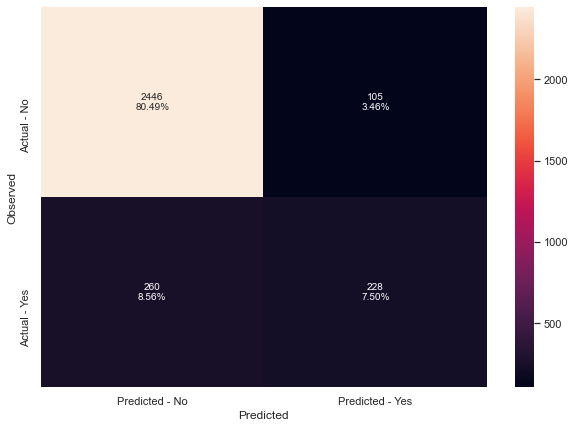

In [368]:
# Confusion matrix using the model
make_confusion_matrix(lr, y_test)

### The model is generalizing well as test and train performance are comparable on accuracy, recall and precision. Although recall seems to be low, precision seems to be fairly good.

### Let's try wthout dropping the column, Avg_Open_To_Buy, to see how performance is:

In [374]:
## rebuilding test/Train without dropping column to see scores..

X=bank_ch.drop("Attrition_Flag", axis=1)
Y=bank_ch["Attrition_Flag"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1,stratify=Y)

## Before imputing value_counts
print(X_train['Income_Category'].value_counts())
print(X_train['Income_Category'].unique())

##Imputing for missing values test and train data separately.
Imp_cols = ['Education_Level','Marital_Status','Income_Category']
X_train[Imp_cols]=imp.fit_transform(X_train[Imp_cols]) 
X_test[Imp_cols]=imp.fit_transform(X_test[Imp_cols]) 

## After imputing value_counts
print(X_train['Income_Category'].value_counts())
print(X_train['Income_Category'].unique())

##One hot encoding of categorical columns.
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
print(X_train.shape, X_test.shape)

1.0    2489
2.0    1254
4.0    1084
3.0     974
5.0     503
Name: Income_Category, dtype: int64
[nan  3.  2.  1.  4.  5.]
1.0    3273
2.0    1254
4.0    1084
3.0     974
5.0     503
Name: Income_Category, dtype: int64
[1. 3. 2. 4. 5.]
(7088, 23) (3039, 23)


In [173]:
#Checking test data to see if the column, Avg_Open_To_Buy is present
X_test.head()

Customer_Age  Dependent_count  Education_Level  Marital_Status  \
7403            38                0              4.0             1.0   
2005            39                2              1.0             1.0   
8270            45                4              6.0             1.0   
646             41                3              4.0             2.0   
1690            65                1              4.0             2.0   

      Income_Category  Months_on_book  Total_Relationship_Count  \
7403              3.0              26                         5   
2005              5.0              26                         2   
8270              4.0              39                         2   
646               4.0              26                         4   
1690              2.0              48                         4   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
7403                       2                      1        3809.0   
2005                       3                      4        8906.0   
8270                       3                      2        1438.3   
646                        3                      2       11806.0   
1690                       2                      4        4599.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
7403                 1521           2288.0                 0.692   
2005                    0           8906.0                 0.315   
8270                 1162            276.3                 0.539   
646                  1811           9995.0                 0.754   
1690                  637           3962.0                 0.622   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
7403             4666              69                0.865   
2005              809              15                0.250   
8270             4598              86                0.623   
646              1465              31                0.476   
1690             2608              78                0.592   

      Avg_Utilization_Ratio  Gender_F  Gender_M  Card_Category_Blue  \
7403                  0.399         0         1                   1   
2005                  0.000         0         1                   1   
8270                  0.808         0         1                   1   
646                   0.153         0         1                   1   
1690                  0.139         1         0                   1   

      Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
7403                   0                       0                     0  
2005                   0                       0                     0  
8270                   0                       0                     0  
646                    0                       0                     0  
1690                   0                       0                     0

In [370]:
## let's try logistic regression without the scaler.
lr2 = LogisticRegression(random_state=1)
lr2.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [371]:
##Getting the scores using the function defined above
Logreg_score=get_metrics_score(lr2)

Accuracy on training set :  0.8817720090293454
Accuracy on test set :  0.8815399802566634
Recall on training set :  0.40561896400351183
Recall on test set :  0.39959016393442626
Precision on training set :  0.7415730337078652
Precision on test set :  0.7442748091603053
F1 on training set :  0.5244040862656073
F1 on test set :  0.5199999999999999


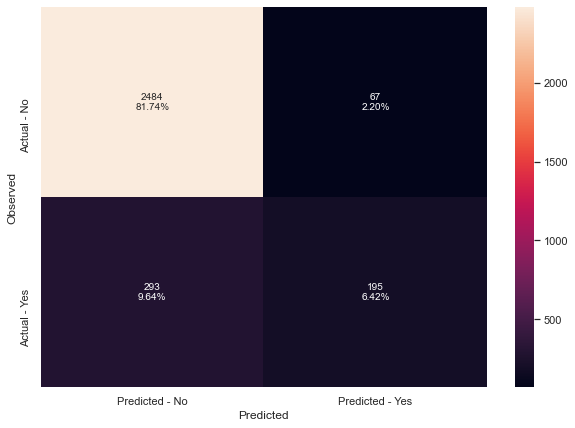

In [375]:
# Confusion matrix using the model
make_confusion_matrix(lr2, y_test)

### Accuracy went up a bit on test set, Precision went up a lot on both train and test but recall came down, by including the column Avg_Open_To_Buy in the model. F1 score went down to 52% from 55% So it may be good to drop the column.


**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

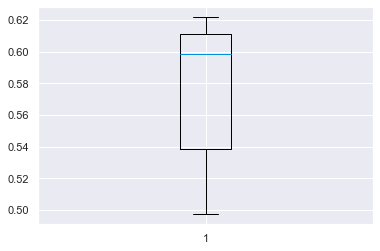

In [183]:
scoring='f1'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.50 to 0.62 f1 score.
* Let's check the performance on test data.

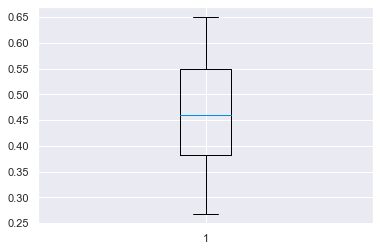

In [184]:
scoring='f1'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_test, y=y_test, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on testing set varies between 0.25 to 0.65 f1 score.


In [178]:
# Let's do the simple piple line to run Logistic regression.StandardScaler is used to scale data, to standardize outliers.
# Iy takes a list of tuples as parameter. The last entry is the call to the modelling algorithm
log_reg = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

# use the pipeline object as you would
# a regular classifier
log_reg.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

Accuracy on training set :  0.9057562076749436
Accuracy on test set :  0.9045738729845344
Recall on training set :  0.591747146619842
Recall on test set :  0.5840163934426229
Precision on training set :  0.7685290763968073
Precision on test set :  0.7661290322580645
F1 on training set :  0.6686507936507936
F1 on test set :  0.6627906976744186


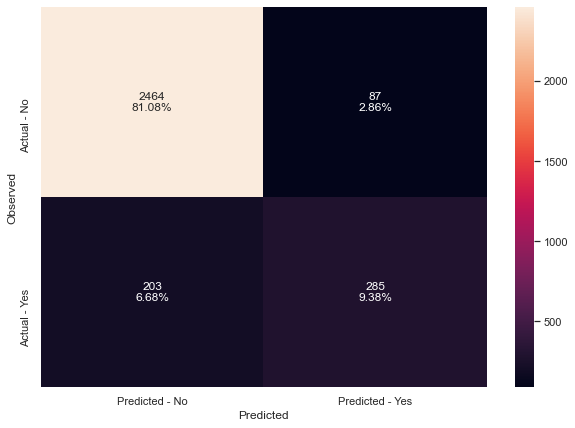

In [179]:
# Calculating different metrics
get_metrics_score(log_reg)

# Creating confusion matrix
make_confusion_matrix(log_reg, y_test)

### Looks like all of the metrics, including accuracy, precision, recall went up quite a bit from simple logistic regression without scaler to the pipeline one with standard scaler. This model has column Avg_Open_To_Buy included. 

#### We can try with the column, Avg_Open_To_Buy dropped.

In [376]:
## rebuilding test/Train and dropping column, Avg_Open_To_Buy again, as we also need recall.

X=bank_ch.drop("Attrition_Flag", axis=1)
Y=bank_ch["Attrition_Flag"]
X.drop(
    columns=[
        "Avg_Open_To_Buy"
    ],
    inplace=True,
)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1,stratify=Y)

## Before imputing value_counts
print(X_train['Income_Category'].value_counts())
print(X_train['Income_Category'].unique())

##Imputing for missing values test and train data separately.
Imp_cols = ['Education_Level','Marital_Status','Income_Category']
X_train[Imp_cols]=imp.fit_transform(X_train[Imp_cols]) 
X_test[Imp_cols]=imp.fit_transform(X_test[Imp_cols]) 

## After imputing value_counts
print(X_train['Income_Category'].value_counts())
print(X_train['Income_Category'].unique())

##One hot encoding of categorical columns.
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
print(X_train.shape, X_test.shape)

X_train.head()

1.0    2489
2.0    1254
4.0    1084
3.0     974
5.0     503
Name: Income_Category, dtype: int64
[nan  3.  2.  1.  4.  5.]
1.0    3273
2.0    1254
4.0    1084
3.0     974
5.0     503
Name: Income_Category, dtype: int64
[1. 3. 2. 4. 5.]
(7088, 22) (3039, 22)


Customer_Age  Dependent_count  Education_Level  Marital_Status  \
4124            50                1              4.0             1.0   
4686            50                0              4.0             3.0   
1276            26                0              4.0             2.0   
6119            65                0              3.0             2.0   
2253            46                3              4.0             2.0   

      Income_Category  Months_on_book  Total_Relationship_Count  \
4124              1.0              43                         6   
4686              3.0              36                         3   
1276              2.0              13                         6   
6119              1.0              55                         3   
2253              4.0              35                         6   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
4124                       1                      2        7985.0   
4686                       3                      2        5444.0   
1276                       3                      4        1643.0   
6119                       3                      0        2022.0   
2253                       3                      4        4930.0   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
4124                    0                 1.032             3873   
4686                 2499                 0.468             4509   
1276                 1101                 0.713             2152   
6119                    0                 0.579             4623   
2253                    0                 1.019             3343   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  \
4124              72                0.674                  0.000         1   
4686              80                0.667                  0.459         0   
1276              50                0.471                  0.670         1   
6119              65                0.548                  0.000         1   
2253              77                0.638                  0.000         0   

      Gender_M  Card_Category_Blue  Card_Category_Gold  \
4124         0                   1                   0   
4686         1                   1                   0   
1276         0                   1                   0   
6119         0                   1                   0   
2253         1                   1                   0   

      Card_Category_Platinum  Card_Category_Silver  
4124                       0                     0  
4686                       0                     0  
1276                       0                     0  
6119                       0                     0  
2253                       0                     0

In [237]:
# Let's do the simple piple line again to run Logistic regression. This time with column, Avg_Open_To_Buy dropped. 
#StandardScaler is used to scale data, to standardize outliers.

log_reg = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

# use the pipeline object as you would
# a regular classifier
log_reg.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

Accuracy on training set :  0.9057562076749436
Accuracy on test set :  0.9045738729845344
Recall on training set :  0.591747146619842
Recall on test set :  0.5840163934426229
Precision on training set :  0.7685290763968073
Precision on test set :  0.7661290322580645
F1 on training set :  0.6686507936507936
F1 on test set :  0.6627906976744186


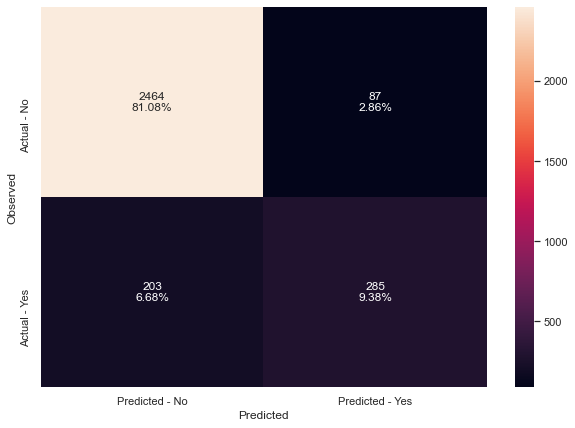

In [238]:
# Calculating different metrics
get_metrics_score(log_reg)

# Creating confusion matrix
make_confusion_matrix(log_reg, y_test)

### There does not seem to be any difference between including or dropping the "Avg_Open_To_Buy" feature in the model in this case when standard scaler is used with pipeline.
* We will keep the column dropped for simplicity then for the future models in this project.

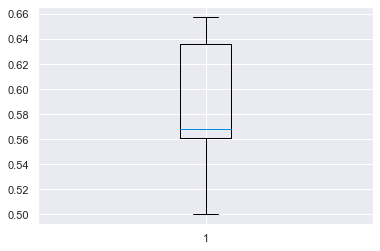

In [239]:
#Plotting boxplots for CV scores of model defined above
scoring='recall'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=log_reg, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

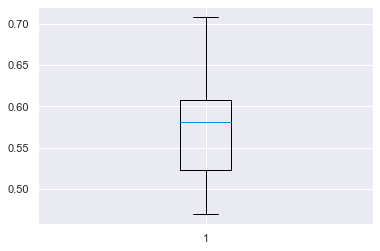

In [240]:
#Plotting boxplots for CV scores of model defined above
scoring='recall'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=log_reg, X=X_test, y=y_test, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Recall score seems to have improved in test by K fold stratification
* Recall varies from 0.5 to 0.66 in training and in test it varies from 0.2 to 0.70
* Lets try:

  a) Oversmapling by SMOTE

  b) Undersampling the train to handle the imbalance between classes and check the model performance.
  
  c) Regularization to see if overfitting can be reduced

### Logistic Regression on oversampled data

In [241]:
#Had to install imblearn
##!pip install imblearn --user
##Commenting out for not rerunning

In [242]:
#Importing SMOTE to create synthetic data for over sampling techniquew
from imblearn.over_sampling import SMOTE

In [390]:
#Running SMOTE to over sample minority class
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 22)
After UpSampling, the shape of train_y: (11898,) 



In [391]:
# Training the logistic regression model with over sampled training set 
log_reg_over = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

log_reg_over.fit(X_train_over,y_train_over)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

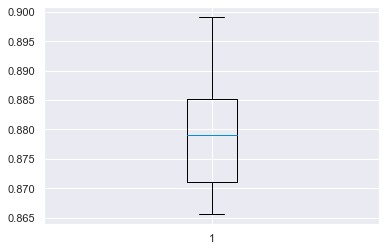

In [245]:
#Plotting boxplots for CV scores of model defined above
scoring='recall'
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Recall in Train improved greatly fro 0.865 to 0.9. 
* Let's check the performance on the test set.

#### Need a slightly modified function for  metrics score to use in case of over sampling and undersampling.

In [395]:
##  Function to calculate different metric scores of the model with oversampling and undersampling
##   Accuracy, Recall and Precision
def get_metrics_score_new(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    train_f1 = metrics.f1_score(train_y, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
        print("F1 on training set : ", metrics.f1_score(train_y, pred_train))
        print("F1 on test set : ", metrics.f1_score(y_test, pred_test))
    
    return score_list # returning the list with train and test scores

Accuracy on training set :  0.8859472180198352
Accuracy on test set :  0.8726554787759131
Recall on training set :  0.8794755421079173
Recall on test set :  0.7909836065573771
Precision on training set :  0.8910081743869209
Precision on test set :  0.5752608047690015
F1 on training set :  0.8852042974367651
F1 on test set :  0.6660914581535806


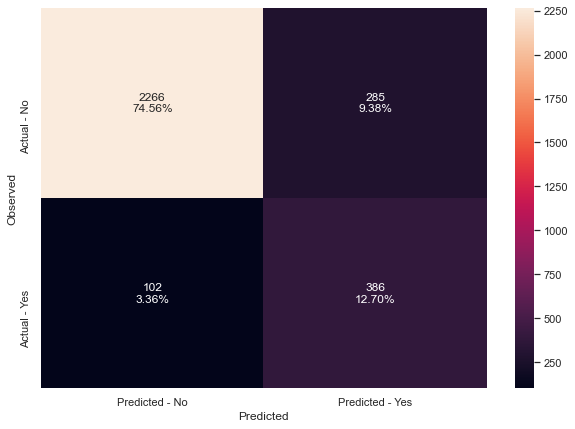

In [247]:
#Calculating different metrics
get_metrics_score_new(log_reg_over,X_train_over,X_test,y_train_over,y_test)
    
# creating confusion matrix
make_confusion_matrix(log_reg_over, y_test)

* With, over sampling Logistic Regression has given a generalized performance on training and test set in terms of accuracy and recall. Overfitting in terms of Precision.
* we can try undersampling

In [392]:
# USing RandomUnderSampler from imblearn to do undersampling majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [393]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 22)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [414]:
log_reg_un = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])


In [415]:
log_reg_un.fit(X_train_un,y_train_un )

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

#### Let's get the metrics for test and train data and create the confusion matrix. 

Accuracy on training set :  0.8353819139596137
Accuracy on test set :  0.8420533070088845
Recall on training set :  0.8402107111501317
Recall on test set :  0.8483606557377049
Precision on training set :  0.8321739130434782
Precision on test set :  0.5048780487804878
F1 on training set :  0.836173001310616
F1 on test set :  0.6330275229357798


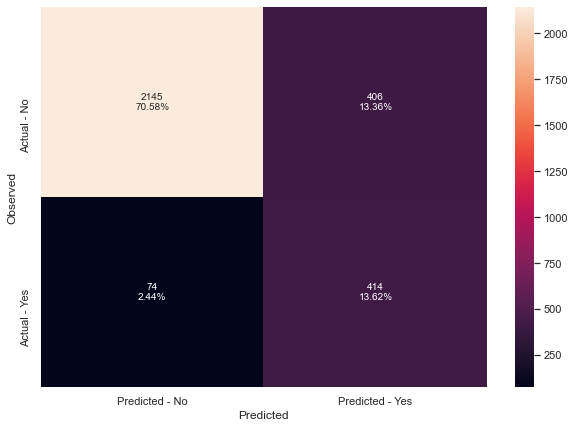

In [416]:
#Calculating different metrics
get_metrics_score_new(log_reg_un,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_un,y_test)

* With, Under sampling Logistic Regression has given a generalized performance on training and test set in terms of accuracy and recall. Overfitting in terms of Precision.
* we can try Regularizing

* Oversample and Undersample data was scaled by using pipe in previous 2 models 

### Regularization on Oversampled data. 
### Here not using pipe, so the data is not scaled (meaning not treated for outliers)

In [406]:
# Choose the type of classifier. solver='saga' is the L1 regularization or lasso.
# Lasso can reduce some coefficients to 0 thereby eliminating some unimportant features altogether from the model
# making it more efficient and reduces complexity and renders better performance

lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, cv=10)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7133972096150614
Accuracy on test set :  0.7660414610069102
Recall on training set :  0.6095142040679106
Recall on test set :  0.5532786885245902
Precision on training set :  0.7693613409717802
Precision on test set :  0.35386631716906947
F1 on training set :  0.680172575501782
F1 on test set :  0.4316546762589928


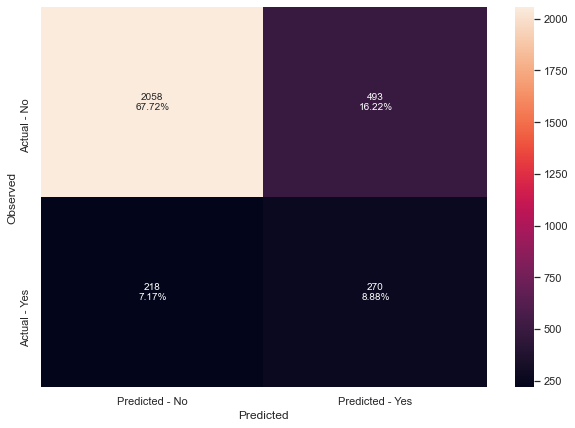

In [408]:
#Calculating different metrics
get_metrics_score_new(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* Precision wise still overfitting. Hence F1 score takes a hit in test data as well.  But other metrics are good

### Regularization on Undersampled data
### Here also not using pipe, so the data is not scaled (meaning not treated for outliers)

In [404]:
# Choose the type of classifier. solver='saga' is the L1 regularization or lasso.
# Lasso can reduce some coefficients to 0 thereby eliminating some unimportant features altogether from the model
# making it more efficient and reduces complexity and renders better performance

lr_estimator_un = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator_un, parameters, cv=10)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator_un = grid_obj.best_estimator_


LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.6685689201053556
Accuracy on test set :  0.7943402435011517
Recall on training set :  0.4784899034240562
Recall on test set :  0.4385245901639344
Precision on training set :  0.7719546742209632
Precision on test set :  0.3787610619469027
F1 on training set :  0.5907859078590786
F1 on test set :  0.4064577397910731


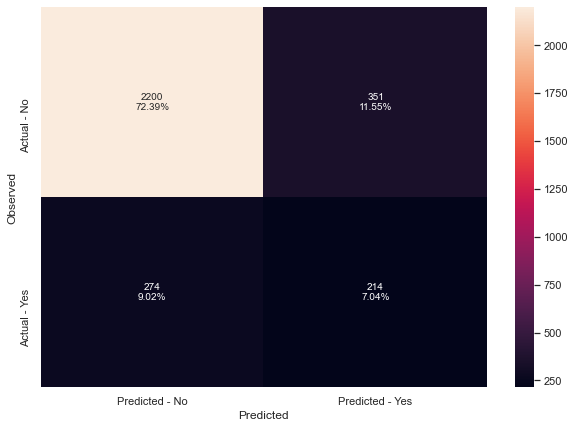

In [409]:
# Fit the best algorithm to the data. 
lr_estimator_un.fit(X_train_un, y_train_un)

#Calculating different metrics
get_metrics_score_new(lr_estimator_un,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator_un,y_test)

* Not really generalizing well after regularizing, but without the standard scaler.

## Regularization on scaled and oversampled data.

In [266]:
#USing StandardScaler to scale data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [267]:
##Now Oversample this scaled data
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over_sc, y_train_over_sc = sm.fit_resample(X_train_scaled, y_train)

In [270]:
# Choose the type of classifier. solver='saga' is the L1 regularization or lasso.
# Lasso can reduce some coefficients to 0 thereby eliminating some unimportant features altogether from the model
# making it more efficient and reduces complexity and renders better performance

lr_sc_over_reg = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_sc_over_reg, parameters, cv=10)
grid_obj = grid_obj.fit(X_train_over_sc, y_train_over_sc)

# Set the clf to the best combination of parameters
lr_sc_over_reg = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_sc_over_reg.fit(X_train_over_sc, y_train_over_sc)

LogisticRegression(C=0.30000000000000004, random_state=1, solver='saga')

Accuracy on training set :  0.8622457555891746
Accuracy on test set :  0.8489634748272458
Recall on training set :  0.8697260043704824
Recall on test set :  0.8463114754098361
Precision on training set :  0.8569062603511096
Precision on test set :  0.5181932245922208
F1 on training set :  0.8632685409193293
F1 on test set :  0.6428015564202334


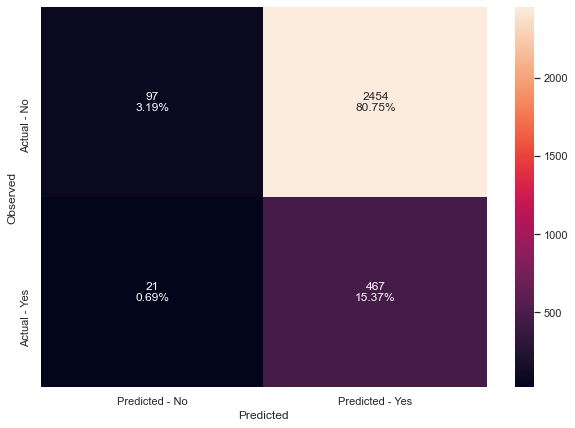

In [272]:
# Fit the best algorithm to the data. 
lr_sc_over_reg.fit(X_train_over_sc, y_train_over_sc)

#Calculating different metrics
get_metrics_score_new(lr_sc_over_reg,X_train_over_sc,X_test_scaled,y_train_over_sc,y_test)

# creating confusion matrix
make_confusion_matrix(lr_sc_over_reg,y_test)

### Insights:
    
    * The best out of all these Logistic regression models seem to be just simple logistic regression using pipeline with 
    standrad scaler. It has best f1 score of 66.27% and generalizing well on test data.
    * Best recall is by the last model regularized model on scaled and oversampled data, but precision take a hit on the              test data. If we only care about reducing false negatives. This may be the best model.

## Model building - Bagging and Boosting
###  Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models

In [279]:
## Decison Tree, Random Forest, Bagging Classifier, XGBoost, AdaBoost and Gradient Boost models are built
## Their recall, precision and f1 scores are compared using Stratified KFold CV.

# Empty list to store all the models
models = [] 

# Appending pipelines for each model into the list

models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(criterion = 'gini',random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "BAGGING",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated recall score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}: {}".format(name, scoring, cv_result.mean() * 100))
    
    
print('-'*30)
print(' '*30)
    
# loop through all models to get the mean cross validated precision score
for name, model in models:
    scoring = "precision"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}: {}".format(name, scoring, cv_result.mean() * 100))
    
print('-'*30)
print(' '*30)
    
# loop through all models to get the mean cross validated precision score
for name, model in models:
    scoring = "f1"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}: {}".format(name, scoring, cv_result.mean() * 100))

RF: recall: 79.80408068629725
GBM: recall: 83.75724553674937
ADB: recall: 84.02117628873947
XGB: recall: 87.00595100085013
DTREE: recall: 78.57639693948528
BAGGING: recall: 82.08826029832291
------------------------------
                              
RF: precision: 92.25577440622158
GBM: precision: 92.82496007395655
ADB: precision: 88.15093873272247
XGB: precision: 92.12354403102789
DTREE: precision: 79.96505564987739
BAGGING: precision: 88.29658253406848
------------------------------
                              
RF: f1: 85.50374566180415
GBM: f1: 88.02015038463239
ADB: f1: 85.9962686430318
XGB: f1: 89.46146190076001
DTREE: f1: 79.16196012523973
BAGGING: f1: 84.98614286815452


#### Looks like XGBoost has best recall, precision and f1 score

## Hyperparameter Tuning using grid search

**We will use pipelines with StandardScaler and  different models and tune the model using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

**We can also use make_pipeline function instead of Pipeline to create a pipeline. it does not require, and does not permit, naming the estimators.**


## Decision Tree - GridSearchCV

In [322]:
#to find the run time
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'decisiontreeclassifier__max_depth': np.arange(1,10), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10],
              'decisiontreeclassifier__min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__min_impurity_decrease': 0.001, 'decisiontreeclassifier__min_samples_leaf': 1} 
Score: 0.7339709405672773
Wall time: 48.7 s


In [325]:
# Creating new pipeline with best parameters
dt_tuned_gcv = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                       min_impurity_decrease=0.001,  min_samples_leaf=1, random_state=1)
    )

dt_tuned_gcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                                        min_impurity_decrease=0.001,
                                        random_state=1))])

Accuracy on training set :  0.9173250564334086
Accuracy on test set :  0.910167818361303
Recall on training set :  0.7401229148375769
Recall on test set :  0.735655737704918
Precision on training set :  0.7440423654015887
Precision on test set :  0.7137176938369781
F1 on training set :  0.7420774647887325
F1 on test set :  0.7245206861755803


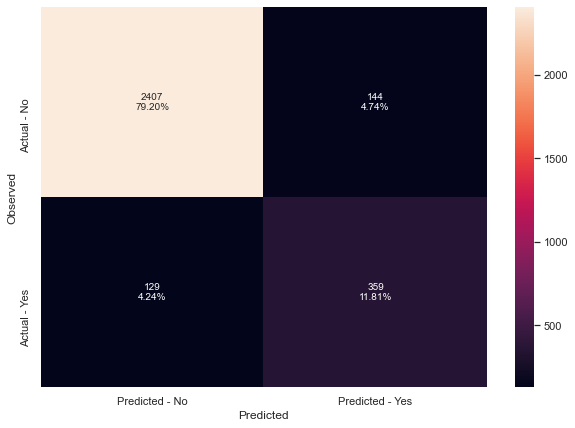

In [326]:
# Calculating different metrics
get_metrics_score(dt_tuned_gcv)

# Creating confusion matrix
make_confusion_matrix(dt_tuned_gcv, y_test)

#### Recall and Precision are generalizing well and pretty good. 

## Decision Tree - RandomizedSearchCV

In [320]:
#to find the run time
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'decisiontreeclassifier__max_depth': np.arange(1,10), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10],
              'decisiontreeclassifier__min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
dt_tuned = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in GridSeachCV
dt_tuned.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__min_impurity_decrease': 0.001, 'decisiontreeclassifier__min_samples_leaf': 1} 
Score: 0.7339709405672773
Wall time: 48.7 s


In [334]:
# Creating new pipeline with best parameters
dt_tuned_rcv = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                       min_impurity_decrease=0.001,  min_samples_leaf=1, random_state=1)
    )

dt_tuned_rcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                                        min_impurity_decrease=0.001,
                                        random_state=1))])

Accuracy on training set :  0.9173250564334086
Accuracy on test set :  0.910167818361303
Recall on training set :  0.7401229148375769
Recall on test set :  0.735655737704918
Precision on training set :  0.7440423654015887
Precision on test set :  0.7137176938369781
F1 on training set :  0.7420774647887325
F1 on test set :  0.7245206861755803


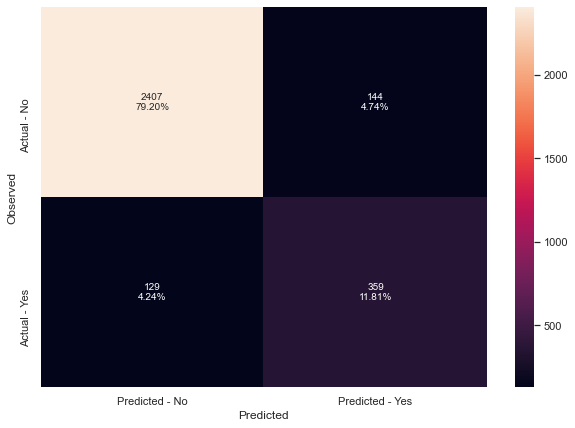

In [335]:
# Calculating different metrics
get_metrics_score(dt_tuned_rcv)

# Creating confusion matrix
make_confusion_matrix(dt_tuned_rcv, y_test)

#### Recall and Precision are generalizing well and pretty good. Scores did not change from grid search to Random search. Model performance improved in terms of run tim

## Random Forest -  GridSearchCV

In [330]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'randomforestclassifier__n_estimators': [25,50,75], 
              'randomforestclassifier__min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'randomforestclassifier__max_features': np.arange(0.2, 0.7, 0.1),
              'randomforestclassifier__max_samples': np.arange(0.3, 0.7, 0.1)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_features': 0.6000000000000001, 'randomforestclassifier__max_samples': 0.5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 75} 
Score: 0.8419738774248395
Wall time: 8min 33s


In [332]:
# Creating new pipeline with best parameters
rf_tuned_gcv = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.5, min_samples_leaf=1,
                       n_estimators=75, random_state=1)
    )

rf_tuned_gcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.6000000000000001,
                                        max_samples=0.5, n_estimators=75,
                                        random_state=1))])

Accuracy on training set :  0.9913939051918735
Accuracy on test set :  0.9647910496873972
Recall on training set :  0.9604916593503073
Recall on test set :  0.8729508196721312
Precision on training set :  0.9855855855855856
Precision on test set :  0.9044585987261147
F1 on training set :  0.9728768341485104
F1 on test set :  0.8884254431699687


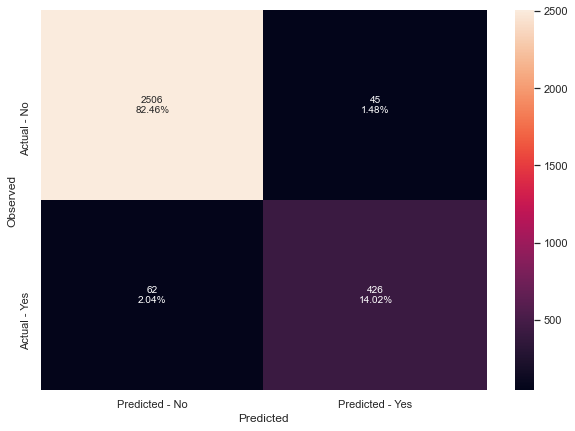

In [333]:
# Calculating different metrics
get_metrics_score(rf_tuned_gcv)

# Creating confusion matrix
make_confusion_matrix(rf_tuned_gcv, y_test)

#### Recall and Precision are generalizing well and improved a lot. 

## Random Forest - RandomizedSearchCV

In [336]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'randomforestclassifier__n_estimators': [25,50,75], 
              'randomforestclassifier__min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'randomforestclassifier__max_features': np.arange(0.2, 0.7, 0.1),
              'randomforestclassifier__max_samples': np.arange(0.3, 0.7, 0.1)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
RF_tuned = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in GridSeachCV
RF_tuned.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_features': 0.6000000000000001, 'randomforestclassifier__max_samples': 0.5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 75} 
Score: 0.8419738774248395
Wall time: 1min


In [338]:
# Creating new pipeline with best parameters
rf_tuned_rcv = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.5, min_samples_leaf=1,
                       n_estimators=75, random_state=1)
    )

    

rf_tuned_rcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.6000000000000001,
                                        max_samples=0.5, n_estimators=75,
                                        random_state=1))])

Accuracy on training set :  0.9913939051918735
Accuracy on test set :  0.9647910496873972
Recall on training set :  0.9604916593503073
Recall on test set :  0.8729508196721312
Precision on training set :  0.9855855855855856
Precision on test set :  0.9044585987261147
F1 on training set :  0.9728768341485104
F1 on test set :  0.8884254431699687


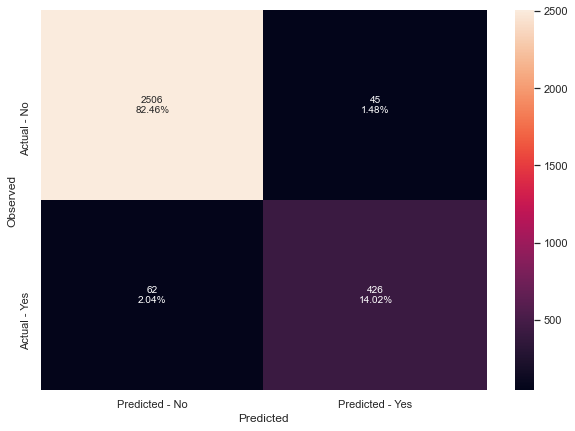

In [340]:
# Calculating different metrics
get_metrics_score(rf_tuned_rcv)

# Creating confusion matrix
make_confusion_matrix(rf_tuned_rcv, y_test)

#### Scores did not change from grid search to Random search. Run time has reduced dramatically.

## Bagging Classifier -  GridSearchCV

In [341]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 50} 
Score: 0.8367068552438365
Wall time: 1min 42s


In [345]:
# Creating new pipeline with best parameters
bc_tuned_gcv = make_pipeline(
    StandardScaler(),
    BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)
    )

bc_tuned_gcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.9,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.9995767494356659
Accuracy on test set :  0.9664363277393879
Recall on training set :  0.9973661106233538
Recall on test set :  0.8709016393442623
Precision on training set :  1.0
Precision on test set :  0.915948275862069
F1 on training set :  0.9986813186813187
F1 on test set :  0.8928571428571429


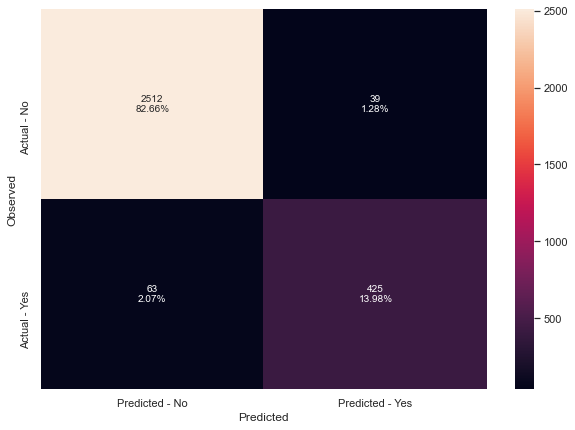

In [346]:
# Calculating different metrics
get_metrics_score(bc_tuned_gcv)

# Creating confusion matrix
make_confusion_matrix(bc_tuned_gcv, y_test)

#### Recall and Precision are generalizing well and are very high

## Bagging Classifier - RandomizedSearchCV

In [344]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators': [10,20,30,40,50]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
bc_tuned = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in GridSeachCV
bc_tuned.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(bc_tuned.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 50} 
Score: 0.8367068552438365
Wall time: 1min 1s


In [347]:
# Creating new pipeline with best parameters
bc_tuned_rcv = make_pipeline(
    StandardScaler(),
     BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)
    
    )

bc_tuned_rcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9, max_samples=0.9,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.9995767494356659
Accuracy on test set :  0.9664363277393879
Recall on training set :  0.9973661106233538
Recall on test set :  0.8709016393442623
Precision on training set :  1.0
Precision on test set :  0.915948275862069
F1 on training set :  0.9986813186813187
F1 on test set :  0.8928571428571429


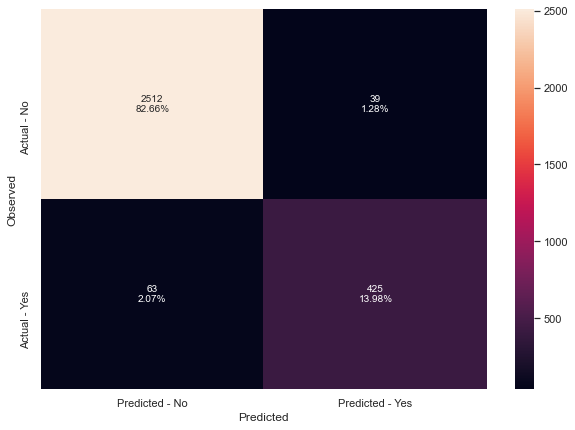

In [348]:
# Calculating different metrics
get_metrics_score(bc_tuned_rcv)

# Creating confusion matrix
make_confusion_matrix(bc_tuned_rcv, y_test)

#### Recall and Precision are generalizing well and very good. Scores did not change from grid search to Random search. Model performance(run time) did not change much 

## AdaBoost

### GridSearchCV

In [289]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'gini',random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__n_estimators": np.arange(10, 110, 10),
    "decisiontreeclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "decisiontreeclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 70} 
Score: 0.8709444315634902
Wall time: 5min 43s


In [285]:
# Creating new pipeline with best parameters
abc_tuned_gcv = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=70,
        learning_rate=1,
        random_state=1,
    ),
)
abc_tuned_gcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=70,
                                    random_state=1))])

Accuracy on training set :  0.9873024830699775
Accuracy on test set :  0.9690687726225732
Recall on training set :  0.9543459174714662
Recall on test set :  0.9016393442622951
Precision on training set :  0.9662222222222222
Precision on test set :  0.9053497942386831
F1 on training set :  0.9602473498233215
F1 on test set :  0.9034907597535935


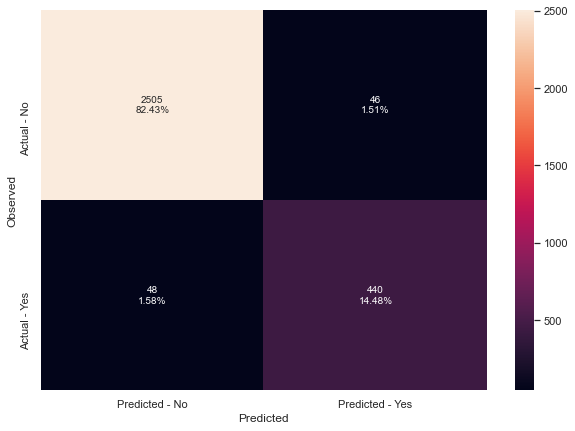

In [286]:
# Calculating different metrics
get_metrics_score(abc_tuned_gcv)

# Creating confusion matrix
make_confusion_matrix(abc_tuned_gcv, y_test)

#### Very high accuracy, recall and precision scores on test data. generalized very well

In [287]:
X_train.head()

Customer_Age  Dependent_count  Education_Level  Marital_Status  \
4124            50                1              4.0             1.0   
4686            50                0              4.0             3.0   
1276            26                0              4.0             2.0   
6119            65                0              3.0             2.0   
2253            46                3              4.0             2.0   

      Income_Category  Months_on_book  Total_Relationship_Count  \
4124              1.0              43                         6   
4686              3.0              36                         3   
1276              2.0              13                         6   
6119              1.0              55                         3   
2253              4.0              35                         6   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
4124                       1                      2        7985.0   
4686                       3                      2        5444.0   
1276                       3                      4        1643.0   
6119                       3                      0        2022.0   
2253                       3                      4        4930.0   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
4124                    0                 1.032             3873   
4686                 2499                 0.468             4509   
1276                 1101                 0.713             2152   
6119                    0                 0.579             4623   
2253                    0                 1.019             3343   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  \
4124              72                0.674                  0.000         1   
4686              80                0.667                  0.459         0   
1276              50                0.471                  0.670         1   
6119              65                0.548                  0.000         1   
2253              77                0.638                  0.000         0   

      Gender_M  Card_Category_Blue  Card_Category_Gold  \
4124         0                   1                   0   
4686         1                   1                   0   
1276         0                   1                   0   
6119         0                   1                   0   
2253         1                   1                   0   

      Card_Category_Platinum  Card_Category_Silver  
4124                       0                     0  
4686                       0                     0  
1276                       0                     0  
6119                       0                     0  
2253                       0                     0

## RandomizedSearchCV - AdaBoost

In [304]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))


Best parameters are {'adaboostclassifier__n_estimators': 100, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8647963521137646:
Wall time: 1min 57s


In [292]:
# Creating new pipeline with best parameters
abc_tuned_rcv = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)
abc_tuned_rcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9937923250564334
Accuracy on test set :  0.9654491609081934
Recall on training set :  0.9754170324846356
Recall on test set :  0.9016393442622951
Precision on training set :  0.9858030168589175
Precision on test set :  0.8853118712273642
F1 on training set :  0.9805825242718446
F1 on test set :  0.8934010152284265


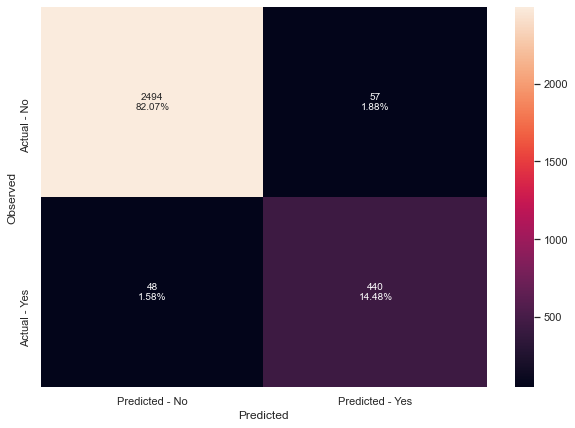

In [293]:
# Calculating different metrics
get_metrics_score(abc_tuned_rcv)

# Creating confusion matrix
make_confusion_matrix(abc_tuned_rcv, y_test)

####  By looking at the scores from the 2 hyper tuning algorithms, GridSearchCV picked parameters are generalizing better than random serach cv provided ones. However dramatically reduced run time for random search cv.

## XGBoost  - GridSearchCV

In [298]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV

param_grid={'xgbclassifier__n_estimators':np.arange(50,200,50),
            'xgbclassifier__learning_rate':[0.01,0.1,0.001],
            'xgbclassifier__max_depth':[3,5,7]
           }
           
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 150} with CV score=0.8648195378313626:
Wall time: 31.7 s


In [299]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,200,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
             'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
             'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

           
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.9} with CV score=0.9490841641548806:
Wall time: 21min 54s


In [301]:
# Creating new pipeline with best parameters
xgb_tuned_gcv = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.05,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned_gcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9509029345372461
Accuracy on test set :  0.9305692662059888
Recall on training set :  0.9982440737489026
Recall on test set :  0.9549180327868853
Precision on training set :  0.7666891436277815
Precision on test set :  0.7114503816793893
F1 on training set :  0.8672768878718535
F1 on test set :  0.8153980752405949


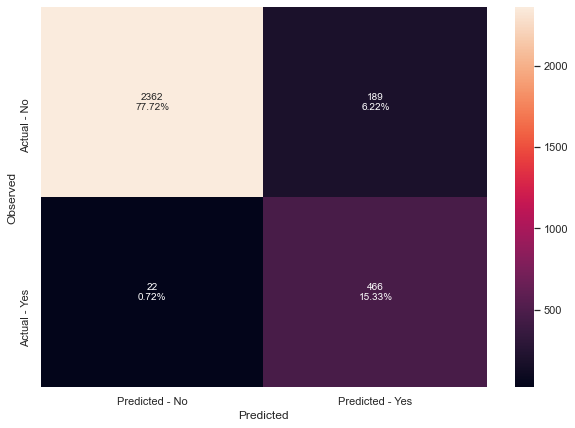

In [305]:
# Calculating different metrics
get_metrics_score(xgb_tuned_gcv)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned_gcv, y_test)

#### Generalizing well. Recall got very high. But Precision has gone down quite a bit. That may be ok.

## XGBoost  - RandomizedSearchCV

In [303]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),
                   XGBClassifier(random_state=1,
                                 eval_metric='logloss',
                                 n_estimators = 50
                                )
                  )

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]
           }





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 3} with CV score=0.9587448798206971:
Wall time: 14.9 s


In [306]:
# Creating new pipeline with best parameters
xgb_tuned_rcv = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                gamma=3,
                subsample=0.8,
                learning_rate= 0.05,
                eval_metric='logloss', max_depth = 2, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned_rcv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.7811794582392777
Accuracy on test set :  0.7713063507732807
Recall on training set :  0.9754170324846356
Recall on test set :  0.9692622950819673
Precision on training set :  0.42179195140470765
Precision on test set :  0.41023417172593235
F1 on training set :  0.5889212827988338
F1 on test set :  0.5764777574649604


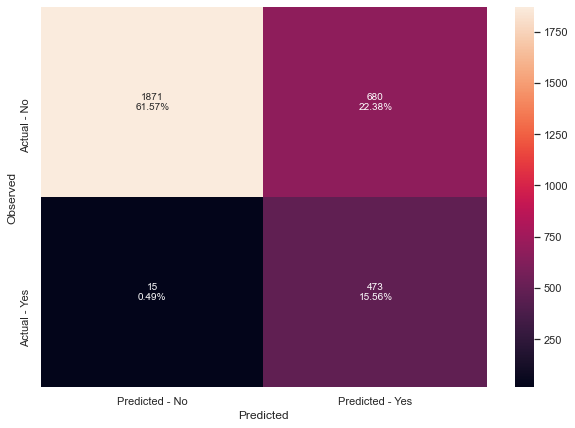

In [307]:
# Calculating different metrics
get_metrics_score(xgb_tuned_rcv)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned_rcv, y_test)

#### Run time came down some. But scores have gone down a lot in random search XGB over grid search XGB


##   Gradient Boost - GridSearchCV

In [350]:
## Checking for paramters to tune.
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [351]:
#Checking run time
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={ "gradientboostingclassifier__n_estimators": [100,150,250,200],
             "gradientboostingclassifier__subsample": [0.8,0.9,1], 'gradientboostingclassifier__max_depth':[1,2,3],
             "gradientboostingclassifier__max_features": [0.7,0.8,0.9,1]}

           
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__max_features': 0.7, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__subsample': 1} with CV score=0.8753535821933689:
Wall time: 8min 35s


In [352]:
# Creating new pipeline with best parameters
gb_tuned_gcv = make_pipeline(
    StandardScaler(),
   GradientBoostingClassifier(
        random_state=1,
        n_estimators=250,
        subsample=1,
        max_features=0.7,
        max_depth=3,
           )
)

# Fit the model on training data
gb_tuned_gcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.7, n_estimators=250,
                                            random_state=1, subsample=1))])

Accuracy on training set :  0.9882900677200903
Accuracy on test set :  0.9756498848305364
Recall on training set :  0.9455662862159789
Recall on test set :  0.9098360655737705
Precision on training set :  0.9808743169398907
Precision on test set :  0.9367088607594937
F1 on training set :  0.9628967367009388
F1 on test set :  0.9230769230769231


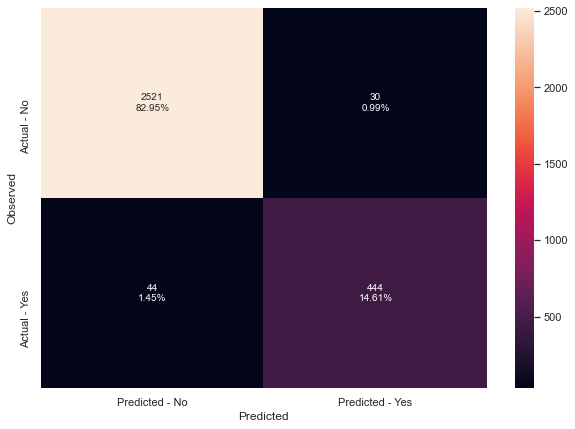

In [353]:
# Calculating different metrics
get_metrics_score(gb_tuned_gcv)

# Creating confusion matrix
make_confusion_matrix(gb_tuned_gcv, y_test)

#### All scores are very good. Genralizing good.

## Gradient Boost  - RandomizedSearchCV

In [355]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),
                   GradientBoostingClassifier(random_state=1)
                  )

#Parameter grid to pass in GridSearchCV
param_grid={ "gradientboostingclassifier__n_estimators": [100,150,250,200],
             "gradientboostingclassifier__subsample": [0.8,0.9,1], 'gradientboostingclassifier__max_depth':[1,2,3],
             "gradientboostingclassifier__max_features": [0.7,0.8,0.9,1]

           }



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.9, 'gradientboostingclassifier__n_estimators': 150, 'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__max_depth': 3} with CV score=0.8577981296854471:
Wall time: 24.7 s


In [356]:
# Creating new pipeline with best parameters
gb_tuned_rcv = make_pipeline(
    StandardScaler(),
   GradientBoostingClassifier(
        random_state=1,
        n_estimators=150,
        subsample=0.9,
        max_features=0.8,
        max_depth=3,
           )
)

# Fit the model on training data
gb_tuned_rcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.8, n_estimators=150,
                                            random_state=1, subsample=0.9))])

Accuracy on training set :  0.9816591422121896
Accuracy on test set :  0.9710431062849622
Recall on training set :  0.9165935030728709
Recall on test set :  0.8831967213114754
Precision on training set :  0.9675625579240037
Precision on test set :  0.9329004329004329
F1 on training set :  0.9413886384129847
F1 on test set :  0.9073684210526316


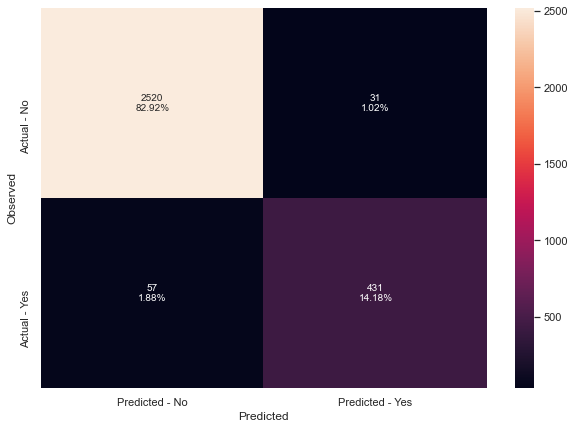

In [357]:
# Calculating different metrics
get_metrics_score(gb_tuned_rcv)

# Creating confusion matrix
make_confusion_matrix(gb_tuned_rcv, y_test)

### Although scores went down a bit, runtime dramatically reduced in random search for Gradient Boost

In [ ]:
## Comparing all models

In [419]:
# defining list of models
models = [ dt_tuned_gcv,dt_tuned_rcv, rf_tuned_gcv,rf_tuned_rcv, bc_tuned_gcv, bc_tuned_rcv, abc_tuned_gcv, abc_tuned_rcv, 
          xgb_tuned_gcv, xgb_tuned_rcv, gb_tuned_gcv, gb_tuned_rcv, lr, log_reg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
      

In [420]:
# defining list of models, over sampled data
models = [ log_reg_over, lr_estimator]


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score_new(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    

In [421]:
# defining list of models, undersampled data
models = [ log_reg_un, lr_estimator_un ]


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score_new(model,X_train_un,X_test,y_train_un,y_test, False)
       
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    

## Model Performances
*  Compare the model performance of all the models - Comment on the time taken by the grid and randomized search in optimization

In [423]:
##Visualizing the model performance comparison using a dataframe
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "Random Forest with GridSearchCV",
            "Random Forest with RandomizedSearchCV",
            "Bagging Classifier with GridSearchCV",
            "Bagging Classifier with RandomizedSearchCV",
            "AdaBoost with GridSearchCV",
            "AdaBoost with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "Gradient Boost with GridSearchCV",
            "Gradient Boost with RandomizedSearchCV",
            "Logistic Regression",
            "Logistic Regression on Scaled data using pipe",
            "Logistic Regression on Oversampled data",
            "Logistic Regression-Regularized (Oversampled data)",
            "Logistic Regression on Undersampled data",
            "Logistic Regression-Regularized on Undersampled data"
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  \
9                     XGBoost with RandomizedSearchCV        0.781179   
8                           XGBoost with GridSearchCV        0.950903   
10                   Gradient Boost with GridSearchCV        0.988290   
6                          AdaBoost with GridSearchCV        0.987302   
7                    AdaBoost with RandomizedSearchCV        0.993792   
11             Gradient Boost with RandomizedSearchCV        0.981659   
2                     Random Forest with GridSearchCV        0.991394   
3               Random Forest with RandomizedSearchCV        0.991394   
4                Bagging Classifier with GridSearchCV        0.999577   
5          Bagging Classifier with RandomizedSearchCV        0.999577   
16           Logistic Regression on Undersampled data        0.835382   
14            Logistic Regression on Oversampled data        0.885947   
0                     Decision Tree with GridSearchCV        0.917325   
1               Decision Tree with RandomizedSearchCV        0.917325   
13      Logistic Regression on Scaled data using pipe        0.905756   
15  Logistic Regression-Regularized (Oversampled d...        0.713397   
12                                Logistic Regression        0.881208   
17  Logistic Regression-Regularized on Undersample...        0.668569   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
9        0.771306      0.975417     0.969262         0.421792        0.410234   
8        0.930569      0.998244     0.954918         0.766689        0.711450   
10       0.975650      0.945566     0.909836         0.980874        0.936709   
6        0.969069      0.954346     0.901639         0.966222        0.905350   
7        0.965449      0.975417     0.901639         0.985803        0.885312   
11       0.971043      0.916594     0.883197         0.967563        0.932900   
2        0.964791      0.960492     0.872951         0.985586        0.904459   
3        0.964791      0.960492     0.872951         0.985586        0.904459   
4        0.966436      0.997366     0.870902         1.000000        0.915948   
5        0.966436      0.997366     0.870902         1.000000        0.915948   
16       0.842053      0.840211     0.848361         0.832174        0.504878   
14       0.872655      0.879476     0.790984         0.891008        0.575261   
0        0.910168      0.740123     0.735656         0.744042        0.713718   
1        0.910168      0.740123     0.735656         0.744042        0.713718   
13       0.904574      0.591747     0.584016         0.768529        0.766129   
15       0.766041      0.609514     0.553279         0.769361        0.353866   
12       0.879895      0.494293     0.467213         0.679131        0.684685   
17       0.794340      0.478490     0.438525         0.771955        0.378761   

    Train_F1   Test_F1  
9   0.588921  0.576478  
8   0.867277  0.815398  
10  0.962897  0.923077  
6   0.960247  0.903491  
7   0.980583  0.893401  
11  0.941389  0.907368  
2   0.972877  0.888425  
3   0.972877  0.888425  
4   0.998681  0.892857  
5   0.998681  0.892857  
16  0.836173  0.633028  
14  0.885204  0.666091  
0   0.742077  0.724521  
1   0.742077  0.724521  
13  0.668651  0.662791  
15  0.680173  0.431655  
12  0.572154  0.555420  
17  0.590786  0.406458

In [425]:
# Sorting models in decreasing order of test F1
comparison_frame.sort_values(by="Test_F1", ascending=False)

Model  Train_Accuracy  \
10                   Gradient Boost with GridSearchCV        0.988290   
11             Gradient Boost with RandomizedSearchCV        0.981659   
6                          AdaBoost with GridSearchCV        0.987302   
7                    AdaBoost with RandomizedSearchCV        0.993792   
4                Bagging Classifier with GridSearchCV        0.999577   
5          Bagging Classifier with RandomizedSearchCV        0.999577   
2                     Random Forest with GridSearchCV        0.991394   
3               Random Forest with RandomizedSearchCV        0.991394   
8                           XGBoost with GridSearchCV        0.950903   
0                     Decision Tree with GridSearchCV        0.917325   
1               Decision Tree with RandomizedSearchCV        0.917325   
14            Logistic Regression on Oversampled data        0.885947   
13      Logistic Regression on Scaled data using pipe        0.905756   
16           Logistic Regression on Undersampled data        0.835382   
9                     XGBoost with RandomizedSearchCV        0.781179   
12                                Logistic Regression        0.881208   
15  Logistic Regression-Regularized (Oversampled d...        0.713397   
17  Logistic Regression-Regularized on Undersample...        0.668569   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  \
10       0.975650      0.945566     0.909836         0.980874        0.936709   
11       0.971043      0.916594     0.883197         0.967563        0.932900   
6        0.969069      0.954346     0.901639         0.966222        0.905350   
7        0.965449      0.975417     0.901639         0.985803        0.885312   
4        0.966436      0.997366     0.870902         1.000000        0.915948   
5        0.966436      0.997366     0.870902         1.000000        0.915948   
2        0.964791      0.960492     0.872951         0.985586        0.904459   
3        0.964791      0.960492     0.872951         0.985586        0.904459   
8        0.930569      0.998244     0.954918         0.766689        0.711450   
0        0.910168      0.740123     0.735656         0.744042        0.713718   
1        0.910168      0.740123     0.735656         0.744042        0.713718   
14       0.872655      0.879476     0.790984         0.891008        0.575261   
13       0.904574      0.591747     0.584016         0.768529        0.766129   
16       0.842053      0.840211     0.848361         0.832174        0.504878   
9        0.771306      0.975417     0.969262         0.421792        0.410234   
12       0.879895      0.494293     0.467213         0.679131        0.684685   
15       0.766041      0.609514     0.553279         0.769361        0.353866   
17       0.794340      0.478490     0.438525         0.771955        0.378761   

    Train_F1   Test_F1  
10  0.962897  0.923077  
11  0.941389  0.907368  
6   0.960247  0.903491  
7   0.980583  0.893401  
4   0.998681  0.892857  
5   0.998681  0.892857  
2   0.972877  0.888425  
3   0.972877  0.888425  
8   0.867277  0.815398  
0   0.742077  0.724521  
1   0.742077  0.724521  
14  0.885204  0.666091  
13  0.668651  0.662791  
16  0.836173  0.633028  
9   0.588921  0.576478  
12  0.572154  0.555420  
15  0.680173  0.431655  
17  0.590786  0.406458

## Time taken by different models hyper tuning by GridSearchCV and RandomizedSearchCV

### Model   -          Time taken by GridSearchCV   -     Time taken by RandomizedSearchCV
- Decison Tree:        -- -   48.7 s                  - -  -               48.7 s
- Random Forest :     - - -  8min 33s                 --   -              1 min 
- Bagging Classifier: - - -  1min 42s                 -  - -              1min 1s
- AdaBoost            - - -  5min 43s                 -  -  -             1min 57s
- XGBoost:           -  - -  21min 54s                -  -  -             14.9 s
- GradientBoost:      - - -  8min 35s                 -  -  -             24.7 s

- Random Forest clearly RandomizedSearchCV is the winner in terms performance (running time). The metrics scores were similar. This is also the case with Random Forest and  Bagging Classifier. Great improvement in time and same metrics scores.
- AdaBoost great improvement in run time, only precison on test little less by 2% other scores are similar.
- XGBoost even though performance in terms of execution is stellar for RandomizedSearchCV, the metrics scores went south. Precision and Accuracy both took big hit. Recall was smilar though.
- GradientBoost performance in terms of execution is stellar for RandomizedSearchCV. The metrics scores were comparable only slightly less.

#### Conclusion. In most cases RandomizedSearchCV improves execution performance by reducing run time a lot compared to GRidSearchCV and also metrics scores are comparable in both cases except XGBoost.


## Feature Importances:

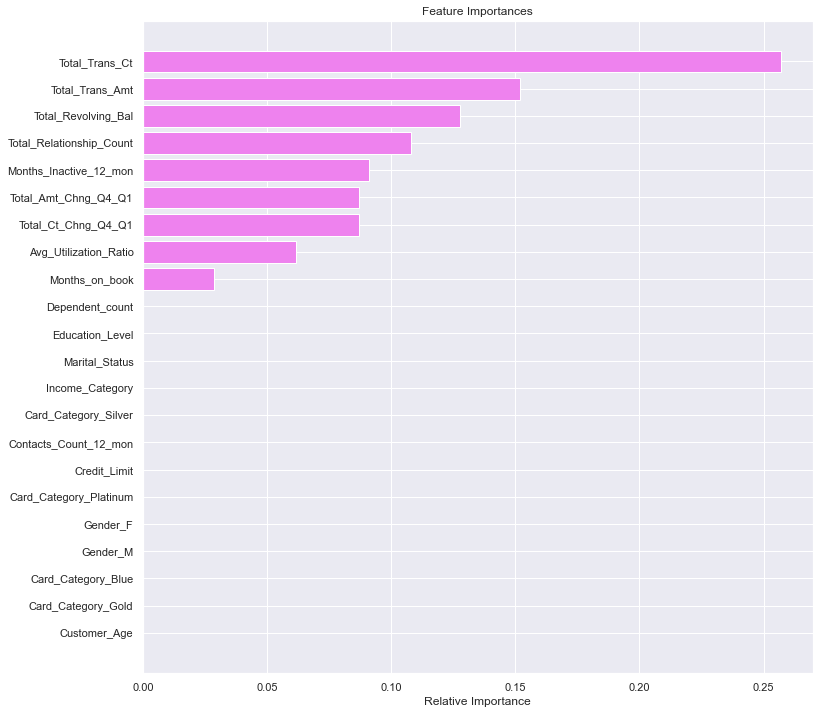

In [440]:
## Plotting feature importance for the top model for Recall - XGBoost with RandomizedSearchCV
feature_names = X_train.columns
importances = xgb_tuned_rcv[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

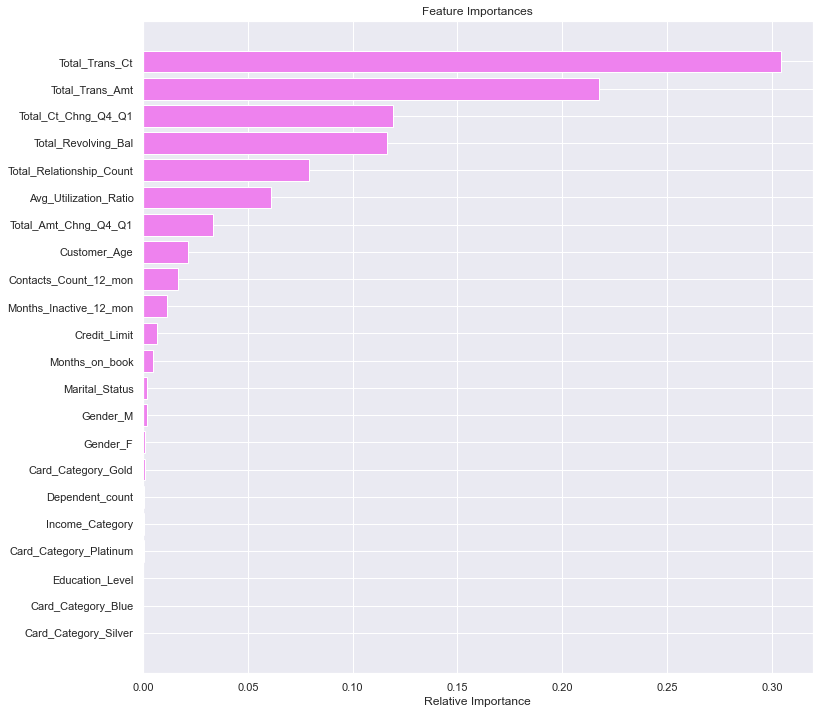

In [441]:
## Plotting feature importance for the top model for both precision and Recall - Gradient Boost with GridSearchCV
feature_names = X_train.columns
importances = gb_tuned_gcv[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Insights and Recommendations:

- When comparing all models looking at the important metrics of Recall and Precision on test data reflected in F1 score, Gradient Boost Tuned using GridSearchCV is the top model, followed by Gradient Boost with RandomizedSearchCV, AdaBoost with GridSearchCV, AdaBoost with RandomizedSearchCV, Bagging Classifier with GridSearchCV. They make sure most marketing is done on possibe churners without targeting non_churners. These models are also generalizing well, by comparable performance on both train and test data 

- If marketing cost is minimal such as emailing customers, we can focus on recalll only thus avoiding false negatives. That's to avoid identifying churners as non-churners. Precision may be low in this case that means false positives could be high. But it is okay to market such cuitomers via email as the expenses are cheap. In this case XGBoost with RandomizedSearchCV has the highest test recall rate of 96.9%. You are likely to identify most churners and be able to proactively take steps to avoid losing their business.  This is followed by XGBoost with GridSearchCV test recall of 95.5% .This also has higher precision (71%) compared to the 41% precision of the top model in this category, so that's good for not worrying about lot of non-churners during marketing.Next is Gradient Boost with GridSearchCV	, AdaBoost with GridSearchC, AdaBoost with RandomizedSearchCV	These have very good test recall of 90% as well as high test precision of 93-88 in that order.

- The most important feature is Total Transaction Count by looking at the top models. If this is lower(below 50), its a likely churner, please go after such customers and give them offers discounts etc. to keep such customers with the bank. Next important feature is, Total_Trans_Amt(Total Transaction Amount for past 12 months). If this is around 2500 or less likely to lose that business, be proactive about taking steps to retain those customers. Then ther are Total_Revolving_Bal, Total_Relationship_Count followed by Months_Inactive_12_mon, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio. Months_on_book also somewhat important. More insights into differnt features are given below, whcih can be used to identify potential curners and proactively take steps to keep their business with the bank.


### More Insights: 
* Distribution of age versus Attiriton_flag is almost similar for both existing and attrited cutomers. Older than 68 folks 
  don't seem to churn. Approximately 40 to 52 age group are the majority churners. They are also  majority of existing cutomers.
* Months on book, churners are mostly between values 32-40, so are non-churners-only slight difference 31-40. Both have outliers on both lower and higher ends.
* Credit limit, churners mostly 10,000 and under with some outliers all the way up.
* Total Revolving balance, 0 - 800 are majority churners, non-churners are above 800, churners are also concentrated upto 1300.
* Average open to buy, majority churners are from 0 to little less than 10,000. Non churners have si,ilar distribution. Both have outliers on the high end.
* Total amt Change between Q1 and Q4, for most attrited customers,0.5- 0.9, non-churners are above 0.7. above 1.5 they don't seem to churn. The higher this value the better for business
* Total transaction amt, most attrited customers are around 2500, few are above that, but majority are non-churners above that. above 10,000 only non-churners. The higher this value the better for business
* Less than 50 total_trans_cnt is mostly churners. Above that mostly non_churners. above 100 no more churning.
* Change in Transaction Count (Q4 over Q1) , majority churners are below 0.6. Above that mostly staying cutomers. Greater than 2.5 no more lost business. ).6 to 0.8 are majority non-churners.Non-churners have outliers upto 3.5 and beyond.
* Average Card Utilization Ratio, how much of credit limit is used, average it over 12 months. If this is low , then likely that business will be lost.Most churners are from 0 to 0.2. Although outliers are all the way till 1.The values from 0.05 to 0.5 are majority staying customers
